<a href="https://colab.research.google.com/github/alivahidi75/GANS/blob/main/ACGAN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as pt
from keras.layers import BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics         import accuracy_score
from numpy import expand_dims
from tensorflow import keras
import tensorflow as tf
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint

import tensorflow as tf
from keras.optimizers import Adam
import keras
from keras import layers as lys
from keras import models as mls
from keras import initializers
from keras.utils import to_categorical as ct
import tensorflow as tf
from tensorflow.keras import layers, models, initializers, Input
from keras.layers import Dense, Embedding, Flatten, Concatenate
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.models import Model
import io
import gdown
import scipy.io

In [2]:
import gdown

# File ID from Google Drive
file_id = "1Z_mEDB60-BnoKCEbiYqxKchk4NSgLcKW"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", "PV_Data.xlsx", quiet=False)

# Load the Excel file
df = pd.read_excel("PV_Data.xlsx")

Downloading...
From: https://drive.google.com/uc?id=1Z_mEDB60-BnoKCEbiYqxKchk4NSgLcKW
To: /content/PV_Data.xlsx
100%|██████████| 396k/396k [00:00<00:00, 21.7MB/s]


In [3]:

np.random.seed(42)
data = df.to_numpy()
input = data[:, 1:8]
output = data[:, 0]
output = output - 1

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
minmax = MinMaxScaler()
X =  minmax.fit_transform(input)
pca = PCA(n_components=7)
pca.fit(X)
X= pca.transform(X)
Y = output

In [4]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)
print(X_test.shape)
print(y_test.shape)
print('**********')
print(X_train.shape)
print(y_train.shape)

(350, 7)
(350,)
**********
(3150, 7)
(3150,)


In [5]:
import pickle

# Ensure X_train, X_test, y_train, y_test exist before saving
data = ((X_train, y_train), (X_test, y_test))

# Save to a file
with open('custom_fashion_mnist.pkl', 'wb') as f:
    pickle.dump(data, f)

print("Dataset saved successfully!")

Dataset saved successfully!


In [6]:
def load_PVdata():
    with open('custom_fashion_mnist.pkl', 'rb') as f:
        data = pickle.load(f)
    return data

In [7]:
def define_discriminator(in_shape=(7,), n_classes=10):
  # image input
  in_image = Input(shape=in_shape)
  # downsample
  fe = Dense(units=180, activation='sigmoid',kernel_initializer=tf.keras.initializers.GlorotNormal(),
    bias_initializer=initializers.Zeros())(in_image)
  fe = LeakyReLU(negative_slope=0.4)(fe)
  # downsample
  fe = Dense(units=140, activation='sigmoid',  kernel_initializer=tf.keras.initializers.GlorotNormal(),
    bias_initializer=initializers.Zeros())(fe)
  fe = LeakyReLU(negative_slope=0.4)(fe)
  # downsample
  fe = Dense(units=120, activation='sigmoid',  kernel_initializer=tf.keras.initializers.GlorotNormal(),
    bias_initializer=initializers.Zeros())(fe)
  fe = LeakyReLU(negative_slope=0.4)(fe)
  # dropout
  fe = Dropout(0.4)(fe)
  # unsupervised output
  out1 = Dense(1, activation = 'sigmoid')(fe)
  # supervised output
  out2 = Dense(n_classes, activation='softmax')(fe)
  # define and compile supervised discriminator model
  model = Model(in_image, [out1, out2])
  opt =  optimizer=Adam(learning_rate= keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.002,decay_steps=10000,decay_rate=0.9),beta_1=0.5)
  model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer = opt)
  return model

model = define_discriminator()
# summarize the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 180)       │      1,440 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 180)       │          0 │ dense[0][0]       │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 140)       │     25,340 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 140)       │          0 │ dense_1[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 120)       │     16,920 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 120)       │          0 │ dense_2[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 120)       │          0 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        121 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10)        │      1,210 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 45,031 (175.90 KB)

 Trainable params: 45,031 (175.90 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
def define_generator(latent_dim = 100, n_outputs=7, n_classes = 10):
    in_label = Input(shape=(1,))
    li = Embedding(n_classes, 10)(in_label)
    li = Flatten()(li)
    # Latent space input
    in_lat = Input(shape=(latent_dim,))

    # Merge latent vector and label embedding
    merged = Concatenate()([in_lat, li])

    fe = Dense(180, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_initializer=initializers.Zeros())(merged)
    fe = Dense(100, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_initializer=initializers.Zeros())(fe)
    out_layer = Dense(n_outputs, activation='relu')(fe)
    model = Model([in_lat, in_label], out_layer)
    return model

model = define_generator()
# summarize the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 10)     │        100 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 10)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 110)       │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 180)       │     19,980 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 100)       │     18,100 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 7)         │        707 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,887 (151.90 KB)

 Trainable params: 38,887 (151.90 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# example of fitting an auxiliary classifier gan (ac-gan) on fashion mnsit
from numpy import zeros
from numpy import ones
from numpy import expand_dims
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Activation
from keras.layers import Concatenate
from keras.initializers import RandomNormal
from matplotlib import pyplot


# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	#for layer in d_model.layers:
	#	if not isinstance(layer, BatchNormalization):
	#		layer.trainable = False
	# connect the outputs of the generator to the inputs of the discriminator
	gan_output = d_model(g_model.output)
	# define gan model as taking noise and label and outputting real/fake and label outputs
	model = Model(g_model.input, gan_output)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
	return model

# load images
def load_real_samples():
	# load dataset
	(trainX, trainy), (_, _) = load_PVdata()
	# expand to 3d, e.g. add channels
	#X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	#X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	#X = (X - 127.5) / 127.5
	print(trainX.shape, trainy.shape)
	return [trainX, trainy]

# select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, latent_dim, n_samples=100):
	# prepare fake examples
	[X, _], _ = generate_fake_samples(g_model, latent_dim, n_samples)
	# scale from [-1,1] to [0,1]
	#X = (X + 1) / 2.0
	# plot images
	for i in range(100):
		# define subplot
		pyplot.subplot(10, 10, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		#pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename1 = 'generated_plot_%04d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
	# save the generator model
	filename2 = 'model_%04d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=2200, n_batch=512):
	# calculate the number of batches per training epoch
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# calculate the size of half a batch of samples
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_steps):
		# get randomly selected 'real' samples
		[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
		# update discriminator model weights
		_,d_r1,d_r2 = d_model.train_on_batch(X_real, [y_real, labels_real])
		# generate 'fake' examples
		[X_fake, labels_fake], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator model weights
		_,d_f,d_f2 = d_model.train_on_batch(X_fake, [y_fake, labels_fake])
		# prepare points in latent space as input for the generator
		[z_input, z_labels] = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		_,g_1,g_2 = gan_model.train_on_batch([z_input, z_labels], [y_gan, z_labels])
		# summarize loss on this batch
		print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_r1,d_r2, d_f,d_f2, g_1,g_2))
		# evaluate the model performance every 'epoch'
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()
# train model
train(generator, discriminator, gan_model, dataset, latent_dim)

(3150, 7) (3150,)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
>1, dr[1.601,2.601], df[1.033,2.595], g[2.453,2.453]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2, dr[1.023,2.562], df[0.930,2.528], g[2.440,2.440]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3, dr[0.901,2.517], df[0.887,2.504], g[2.444,2.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>4, dr[0.866,2.496], df[0.866,2.481], g[2.444,2.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>5, dr[0.844,2.473], df[0.845,2.465], g[2.436,2.436]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>6, dr[0.830,2.467], df[0.831,2.462], g[2.424,2.424]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>7, dr[0.821,2.461], df[0.820,2.458], g[2.421,2.421]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>8, dr[0.812,2.455], df[0.810,2.452], g[2.418,2.418]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>9, dr[0.803,2.451], df[0.804,2.449], g[2.417,2.417]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>10, dr[0.798,2.445], df[0.799,2.442], g[2.412,2.412]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>11, dr[0.795,2.441], df[0.795,2

>Saved: generated_plot_0060.png and model_0060.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>61, dr[0.747,2.355], df[0.747,2.354], g[2.349,2.349]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>62, dr[0.746,2.354], df[0.747,2.354], g[2.348,2.348]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>63, dr[0.746,2.353], df[0.746,2.353], g[2.348,2.348]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>64, dr[0.746,2.352], df[0.746,2.352], g[2.347,2.347]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>65, dr[0.745,2.352], df[0.746,2.351], g[2.347,2.347]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>66, dr[0.745,2.351], df[0.745,2.351], g[2.346,2.346]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>67, dr[0.745,2.350], df[0.745,2.350], g[2.346,2.346]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>68, dr[0.744,2.350], df[0.744,2.349], g[2.346,2.346]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>69, dr[0.744,2.349], df[0.744,2.349], g[2.345,2.345]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>70, dr[0.744,2.349], df[0.744,2.349], g[2.344,2.344]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

>Saved: generated_plot_0120.png and model_0120.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>121, dr[0.731,2.332], df[0.731,2.332], g[2.329,2.329]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>122, dr[0.730,2.331], df[0.730,2.331], g[2.329,2.329]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>123, dr[0.730,2.331], df[0.730,2.331], g[2.329,2.329]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>124, dr[0.730,2.331], df[0.730,2.331], g[2.329,2.329]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>125, dr[0.730,2.331], df[0.730,2.331], g[2.329,2.329]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>126, dr[0.730,2.331], df[0.730,2.331], g[2.328,2.328]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>127, dr[0.729,2.330], df[0.729,2.330], g[2.328,2.328]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>128, dr[0.729,2.330], df[0.729,2.330], g[2.328,2.328]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>129, dr[0.729,2.330], df[0.729,2.330], g[2.328,2.328]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>130, dr[0.729,2.330], df[0.729,2.330], g[2.328,2.328]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0180.png and model_0180.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>181, dr[0.722,2.322], df[0.722,2.322], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>182, dr[0.722,2.322], df[0.722,2.322], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>183, dr[0.721,2.322], df[0.722,2.322], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>184, dr[0.721,2.322], df[0.721,2.322], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>185, dr[0.721,2.322], df[0.721,2.322], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>186, dr[0.721,2.322], df[0.721,2.322], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>187, dr[0.721,2.322], df[0.721,2.322], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>188, dr[0.721,2.322], df[0.721,2.322], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>189, dr[0.721,2.322], df[0.721,2.322], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>190, dr[0.721,2.321], df[0.721,2.321], g[2.321,2.321]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0240.png and model_0240.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>241, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>242, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>243, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>244, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>245, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>246, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>247, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>248, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>249, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>250, dr[0.716,2.317], df[0.716,2.317], g[2.317,2.317]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0300.png and model_0300.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>301, dr[0.713,2.314], df[0.713,2.314], g[2.315,2.315]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>302, dr[0.713,2.314], df[0.713,2.314], g[2.314,2.314]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>303, dr[0.713,2.314], df[0.713,2.314], g[2.314,2.314]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>304, dr[0.713,2.314], df[0.713,2.314], g[2.314,2.314]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>305, dr[0.713,2.314], df[0.713,2.314], g[2.314,2.314]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>306, dr[0.713,2.314], df[0.713,2.314], g[2.314,2.314]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>307, dr[0.713,2.314], df[0.713,2.314], g[2.314,2.314]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>308, dr[0.713,2.313], df[0.713,2.313], g[2.314,2.314]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>309, dr[0.713,2.313], df[0.713,2.313], g[2.314,2.314]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>310, dr[0.713,2.313], df[0.713,2.313], g[2.314,2.314]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0360.png and model_0360.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>361, dr[0.708,2.274], df[0.708,2.274], g[2.283,2.283]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>362, dr[0.708,2.273], df[0.708,2.273], g[2.281,2.281]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>363, dr[0.708,2.272], df[0.708,2.271], g[2.280,2.280]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>364, dr[0.708,2.270], df[0.708,2.270], g[2.279,2.279]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>365, dr[0.708,2.269], df[0.708,2.269], g[2.278,2.278]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>366, dr[0.708,2.268], df[0.708,2.267], g[2.277,2.277]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>367, dr[0.708,2.266], df[0.708,2.266], g[2.275,2.275]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>368, dr[0.708,2.265], df[0.708,2.264], g[2.274,2.274]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>369, dr[0.708,2.264], df[0.708,2.263], g[2.273,2.273]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>370, dr[0.708,2.262], df[0.708,2.262], g[2.272,2.272]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0420.png and model_0420.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>421, dr[0.703,2.190], df[0.703,2.190], g[2.208,2.208]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>422, dr[0.703,2.189], df[0.703,2.188], g[2.207,2.207]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>423, dr[0.703,2.188], df[0.703,2.187], g[2.206,2.206]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>424, dr[0.703,2.186], df[0.703,2.186], g[2.204,2.204]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>425, dr[0.702,2.185], df[0.702,2.184], g[2.203,2.203]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>426, dr[0.702,2.184], df[0.702,2.183], g[2.202,2.202]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>427, dr[0.702,2.182], df[0.702,2.182], g[2.201,2.201]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>428, dr[0.702,2.181], df[0.702,2.180], g[2.200,2.200]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>429, dr[0.702,2.179], df[0.702,2.179], g[2.198,2.198]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>430, dr[0.702,2.178], df[0.702,2.178], g[2.197,2.197]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0480.png and model_0480.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>481, dr[0.692,2.113], df[0.692,2.112], g[2.142,2.142]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>482, dr[0.692,2.112], df[0.692,2.111], g[2.141,2.141]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>483, dr[0.692,2.110], df[0.691,2.110], g[2.141,2.141]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>484, dr[0.691,2.109], df[0.691,2.109], g[2.139,2.139]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>485, dr[0.691,2.108], df[0.691,2.107], g[2.138,2.138]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>486, dr[0.691,2.107], df[0.691,2.106], g[2.137,2.137]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>487, dr[0.691,2.105], df[0.691,2.105], g[2.136,2.136]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>488, dr[0.690,2.104], df[0.690,2.104], g[2.135,2.135]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>489, dr[0.690,2.103], df[0.690,2.102], g[2.134,2.134]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>490, dr[0.690,2.101], df[0.690,2.101], g[2.133,2.133]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0540.png and model_0540.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>541, dr[0.680,2.041], df[0.680,2.041], g[2.084,2.084]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>542, dr[0.679,2.040], df[0.679,2.040], g[2.083,2.083]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>543, dr[0.679,2.039], df[0.679,2.039], g[2.082,2.082]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>544, dr[0.679,2.038], df[0.679,2.038], g[2.081,2.081]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>545, dr[0.679,2.037], df[0.679,2.037], g[2.080,2.080]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>546, dr[0.679,2.036], df[0.678,2.035], g[2.080,2.080]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>547, dr[0.678,2.035], df[0.678,2.034], g[2.079,2.079]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>548, dr[0.678,2.034], df[0.678,2.033], g[2.078,2.078]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>549, dr[0.678,2.033], df[0.678,2.032], g[2.077,2.077]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>550, dr[0.678,2.031], df[0.678,2.031], g[2.076,2.076]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0600.png and model_0600.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>601, dr[0.667,1.980], df[0.667,1.980], g[2.035,2.035]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>602, dr[0.667,1.979], df[0.667,1.979], g[2.035,2.035]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>603, dr[0.666,1.978], df[0.666,1.978], g[2.034,2.034]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>604, dr[0.666,1.977], df[0.666,1.977], g[2.033,2.033]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>605, dr[0.666,1.976], df[0.666,1.976], g[2.033,2.033]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>606, dr[0.666,1.975], df[0.666,1.975], g[2.032,2.032]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>607, dr[0.666,1.974], df[0.666,1.974], g[2.031,2.031]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>608, dr[0.665,1.973], df[0.665,1.973], g[2.030,2.030]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>609, dr[0.665,1.972], df[0.665,1.972], g[2.030,2.030]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>610, dr[0.665,1.972], df[0.665,1.971], g[2.029,2.029]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0660.png and model_0660.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>661, dr[0.654,1.928], df[0.654,1.927], g[1.997,1.997]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>662, dr[0.654,1.927], df[0.653,1.927], g[1.997,1.997]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>663, dr[0.653,1.926], df[0.653,1.926], g[1.996,1.996]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>664, dr[0.653,1.925], df[0.653,1.925], g[1.996,1.996]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>665, dr[0.653,1.925], df[0.653,1.924], g[1.995,1.995]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>666, dr[0.653,1.924], df[0.653,1.924], g[1.995,1.995]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>667, dr[0.652,1.923], df[0.652,1.923], g[1.994,1.994]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>668, dr[0.652,1.922], df[0.652,1.922], g[1.994,1.994]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>669, dr[0.652,1.922], df[0.652,1.921], g[1.993,1.993]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>670, dr[0.652,1.921], df[0.652,1.921], g[1.993,1.993]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0720.png and model_0720.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>721, dr[0.639,1.887], df[0.639,1.886], g[1.970,1.970]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>722, dr[0.639,1.886], df[0.638,1.886], g[1.969,1.969]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>723, dr[0.638,1.885], df[0.638,1.885], g[1.969,1.969]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>724, dr[0.638,1.885], df[0.638,1.885], g[1.968,1.968]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>725, dr[0.638,1.884], df[0.638,1.884], g[1.968,1.968]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>726, dr[0.637,1.883], df[0.637,1.883], g[1.968,1.968]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>727, dr[0.637,1.883], df[0.637,1.883], g[1.967,1.967]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>728, dr[0.637,1.882], df[0.637,1.882], g[1.967,1.967]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>729, dr[0.636,1.881], df[0.636,1.881], g[1.966,1.966]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>730, dr[0.636,1.881], df[0.636,1.881], g[1.966,1.966]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0780.png and model_0780.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>781, dr[0.619,1.852], df[0.619,1.852], g[1.951,1.951]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>782, dr[0.618,1.851], df[0.618,1.851], g[1.951,1.951]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>783, dr[0.618,1.851], df[0.618,1.851], g[1.950,1.950]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>784, dr[0.617,1.850], df[0.617,1.850], g[1.950,1.950]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>785, dr[0.617,1.849], df[0.617,1.849], g[1.950,1.950]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>786, dr[0.617,1.849], df[0.617,1.849], g[1.950,1.950]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>787, dr[0.616,1.848], df[0.616,1.848], g[1.949,1.949]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>788, dr[0.616,1.848], df[0.616,1.848], g[1.949,1.949]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>789, dr[0.616,1.847], df[0.615,1.847], g[1.949,1.949]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>790, dr[0.615,1.847], df[0.615,1.847], g[1.949,1.949]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0840.png and model_0840.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>841, dr[0.601,1.820], df[0.600,1.820], g[1.940,1.940]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>842, dr[0.600,1.819], df[0.600,1.819], g[1.940,1.940]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>843, dr[0.600,1.819], df[0.600,1.819], g[1.940,1.940]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>844, dr[0.600,1.818], df[0.600,1.818], g[1.940,1.940]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>845, dr[0.600,1.818], df[0.600,1.818], g[1.940,1.940]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>846, dr[0.599,1.817], df[0.599,1.817], g[1.939,1.939]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>847, dr[0.599,1.817], df[0.599,1.817], g[1.939,1.939]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>848, dr[0.599,1.816], df[0.599,1.816], g[1.939,1.939]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>849, dr[0.599,1.816], df[0.599,1.816], g[1.939,1.939]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>850, dr[0.599,1.815], df[0.599,1.815], g[1.939,1.939]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0900.png and model_0900.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>901, dr[0.590,1.791], df[0.590,1.791], g[1.931,1.931]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>902, dr[0.590,1.790], df[0.590,1.790], g[1.930,1.930]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>903, dr[0.590,1.790], df[0.590,1.790], g[1.930,1.930]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>904, dr[0.590,1.789], df[0.590,1.789], g[1.930,1.930]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>905, dr[0.590,1.789], df[0.590,1.789], g[1.930,1.930]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>906, dr[0.589,1.788], df[0.589,1.788], g[1.930,1.930]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>907, dr[0.589,1.788], df[0.589,1.788], g[1.930,1.930]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>908, dr[0.589,1.787], df[0.589,1.787], g[1.929,1.929]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>909, dr[0.589,1.787], df[0.589,1.787], g[1.929,1.929]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>910, dr[0.589,1.786], df[0.589,1.786], g[1.929,1.929]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_0960.png and model_0960.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>961, dr[0.583,1.761], df[0.583,1.761], g[1.917,1.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>962, dr[0.583,1.761], df[0.583,1.761], g[1.917,1.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>963, dr[0.583,1.760], df[0.583,1.760], g[1.917,1.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>964, dr[0.583,1.760], df[0.583,1.760], g[1.917,1.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>965, dr[0.583,1.760], df[0.583,1.759], g[1.916,1.916]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>966, dr[0.582,1.759], df[0.582,1.759], g[1.916,1.916]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>967, dr[0.582,1.758], df[0.582,1.758], g[1.916,1.916]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>968, dr[0.582,1.758], df[0.582,1.758], g[1.915,1.915]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>969, dr[0.582,1.757], df[0.582,1.757], g[1.915,1.915]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>970, dr[0.582,1.757], df[0.582,1.757], g[1.915,1.915]
8/8 ━━━━━━━━━━━━━━━━

>Saved: generated_plot_1020.png and model_1020.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1021, dr[0.578,1.732], df[0.578,1.732], g[1.901,1.901]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1022, dr[0.578,1.731], df[0.578,1.731], g[1.901,1.901]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>1023, dr[0.578,1.731], df[0.578,1.731], g[1.901,1.901]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1024, dr[0.577,1.730], df[0.577,1.730], g[1.901,1.901]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>1025, dr[0.577,1.730], df[0.577,1.730], g[1.900,1.900]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1026, dr[0.577,1.729], df[0.577,1.729], g[1.900,1.900]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1027, dr[0.577,1.729], df[0.577,1.729], g[1.900,1.900]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1028, dr[0.577,1.728], df[0.577,1.728], g[1.899,1.899]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1029, dr[0.577,1.728], df[0.577,1.728], g[1.899,1.899]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1030, dr[0.577,1.728], df[0.577,1.727], g[1.899,1.899]
8/8 ━━━━━━

>Saved: generated_plot_1080.png and model_1080.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1081, dr[0.572,1.703], df[0.572,1.703], g[1.885,1.885]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1082, dr[0.572,1.703], df[0.572,1.703], g[1.884,1.884]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1083, dr[0.572,1.702], df[0.572,1.702], g[1.884,1.884]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1084, dr[0.572,1.702], df[0.572,1.702], g[1.884,1.884]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1085, dr[0.572,1.701], df[0.572,1.701], g[1.884,1.884]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1086, dr[0.572,1.701], df[0.572,1.701], g[1.883,1.883]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1087, dr[0.572,1.701], df[0.572,1.700], g[1.883,1.883]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1088, dr[0.572,1.700], df[0.572,1.700], g[1.883,1.883]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1089, dr[0.572,1.700], df[0.572,1.699], g[1.882,1.882]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1090, dr[0.571,1.699], df[0.571,1.699], g[1.882,1.882]
8/8 ━━━━━━

>Saved: generated_plot_1140.png and model_1140.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1141, dr[0.566,1.675], df[0.566,1.675], g[1.866,1.866]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1142, dr[0.566,1.675], df[0.566,1.675], g[1.866,1.866]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1143, dr[0.566,1.675], df[0.566,1.675], g[1.866,1.866]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1144, dr[0.566,1.674], df[0.566,1.674], g[1.865,1.865]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1145, dr[0.566,1.674], df[0.566,1.674], g[1.865,1.865]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1146, dr[0.566,1.673], df[0.566,1.673], g[1.865,1.865]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1147, dr[0.566,1.673], df[0.566,1.673], g[1.864,1.864]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1148, dr[0.566,1.672], df[0.566,1.672], g[1.864,1.864]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1149, dr[0.566,1.672], df[0.566,1.672], g[1.864,1.864]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1150, dr[0.566,1.672], df[0.566,1.672], g[1.864,1.864]
8/8 ━━━━━━

>Saved: generated_plot_1200.png and model_1200.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1201, dr[0.562,1.650], df[0.562,1.649], g[1.847,1.847]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1202, dr[0.562,1.649], df[0.562,1.649], g[1.847,1.847]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1203, dr[0.562,1.649], df[0.562,1.649], g[1.846,1.846]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1204, dr[0.562,1.648], df[0.562,1.648], g[1.846,1.846]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1205, dr[0.562,1.648], df[0.562,1.648], g[1.846,1.846]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1206, dr[0.562,1.647], df[0.562,1.647], g[1.845,1.845]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1207, dr[0.562,1.647], df[0.562,1.647], g[1.845,1.845]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1208, dr[0.562,1.646], df[0.562,1.646], g[1.845,1.845]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1209, dr[0.562,1.646], df[0.562,1.646], g[1.844,1.844]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1210, dr[0.561,1.646], df[0.561,1.645], g[1.844,1.844]
8/8 ━━━━━━

>Saved: generated_plot_1260.png and model_1260.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1261, dr[0.557,1.624], df[0.557,1.623], g[1.826,1.826]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1262, dr[0.557,1.623], df[0.557,1.623], g[1.825,1.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1263, dr[0.557,1.623], df[0.557,1.623], g[1.825,1.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1264, dr[0.557,1.622], df[0.557,1.622], g[1.825,1.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1265, dr[0.557,1.622], df[0.556,1.622], g[1.824,1.824]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1266, dr[0.556,1.622], df[0.556,1.621], g[1.824,1.824]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1267, dr[0.556,1.621], df[0.556,1.621], g[1.823,1.823]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1268, dr[0.556,1.621], df[0.556,1.621], g[1.823,1.823]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1269, dr[0.556,1.620], df[0.556,1.620], g[1.823,1.823]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1270, dr[0.556,1.620], df[0.556,1.620], g[1.822,1.822]
8/8 ━━━━━━

>Saved: generated_plot_1320.png and model_1320.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1321, dr[0.551,1.599], df[0.551,1.599], g[1.803,1.803]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1322, dr[0.551,1.599], df[0.551,1.598], g[1.803,1.803]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>1323, dr[0.551,1.598], df[0.551,1.598], g[1.803,1.803]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1324, dr[0.551,1.598], df[0.551,1.598], g[1.802,1.802]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1325, dr[0.551,1.597], df[0.551,1.597], g[1.802,1.802]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1326, dr[0.551,1.597], df[0.551,1.597], g[1.802,1.802]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1327, dr[0.551,1.596], df[0.551,1.596], g[1.801,1.801]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1328, dr[0.551,1.596], df[0.551,1.596], g[1.801,1.801]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1329, dr[0.551,1.596], df[0.551,1.595], g[1.801,1.801]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1330, dr[0.551,1.595], df[0.551,1.595], g[1.800,1.800]
8/8 ━━━━━━

>Saved: generated_plot_1380.png and model_1380.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1381, dr[0.546,1.575], df[0.546,1.575], g[1.781,1.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1382, dr[0.546,1.574], df[0.546,1.574], g[1.781,1.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1383, dr[0.546,1.574], df[0.546,1.574], g[1.781,1.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1384, dr[0.546,1.574], df[0.546,1.573], g[1.780,1.780]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1385, dr[0.546,1.573], df[0.546,1.573], g[1.780,1.780]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1386, dr[0.546,1.573], df[0.546,1.573], g[1.780,1.780]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1387, dr[0.546,1.572], df[0.546,1.572], g[1.779,1.779]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1388, dr[0.546,1.572], df[0.546,1.572], g[1.779,1.779]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1389, dr[0.545,1.572], df[0.545,1.571], g[1.778,1.778]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1390, dr[0.545,1.571], df[0.545,1.571], g[1.778,1.778]
8/8 ━━━━━━

>Saved: generated_plot_1440.png and model_1440.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1441, dr[0.541,1.552], df[0.541,1.552], g[1.759,1.759]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1442, dr[0.541,1.551], df[0.541,1.551], g[1.759,1.759]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1443, dr[0.541,1.551], df[0.541,1.551], g[1.759,1.759]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1444, dr[0.541,1.551], df[0.541,1.550], g[1.758,1.758]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1445, dr[0.541,1.550], df[0.541,1.550], g[1.758,1.758]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1446, dr[0.541,1.550], df[0.541,1.550], g[1.758,1.758]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1447, dr[0.541,1.549], df[0.540,1.549], g[1.757,1.757]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1448, dr[0.540,1.549], df[0.540,1.549], g[1.757,1.757]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1449, dr[0.540,1.549], df[0.540,1.548], g[1.757,1.757]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1450, dr[0.540,1.548], df[0.540,1.548], g[1.756,1.756]
8/8 ━━━━━━

>Saved: generated_plot_1500.png and model_1500.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1501, dr[0.536,1.529], df[0.536,1.529], g[1.737,1.737]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1502, dr[0.536,1.529], df[0.536,1.529], g[1.737,1.737]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1503, dr[0.536,1.528], df[0.535,1.528], g[1.736,1.736]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1504, dr[0.535,1.528], df[0.535,1.528], g[1.736,1.736]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1505, dr[0.535,1.528], df[0.535,1.528], g[1.735,1.735]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1506, dr[0.535,1.527], df[0.535,1.527], g[1.735,1.735]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1507, dr[0.535,1.527], df[0.535,1.527], g[1.735,1.735]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1508, dr[0.535,1.526], df[0.535,1.526], g[1.734,1.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1509, dr[0.535,1.526], df[0.535,1.526], g[1.734,1.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1510, dr[0.535,1.526], df[0.535,1.526], g[1.734,1.734]
8/8 ━━━━━━

>Saved: generated_plot_1560.png and model_1560.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1561, dr[0.530,1.507], df[0.530,1.507], g[1.715,1.715]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1562, dr[0.530,1.506], df[0.530,1.506], g[1.714,1.714]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1563, dr[0.530,1.506], df[0.530,1.506], g[1.714,1.714]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1564, dr[0.530,1.506], df[0.530,1.506], g[1.714,1.714]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1565, dr[0.530,1.505], df[0.530,1.505], g[1.713,1.713]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1566, dr[0.530,1.505], df[0.530,1.505], g[1.713,1.713]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1567, dr[0.530,1.504], df[0.530,1.504], g[1.712,1.712]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1568, dr[0.530,1.504], df[0.530,1.504], g[1.712,1.712]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1569, dr[0.530,1.504], df[0.529,1.504], g[1.712,1.712]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1570, dr[0.529,1.503], df[0.529,1.503], g[1.711,1.711]
8/8 ━━━━━━

>Saved: generated_plot_1620.png and model_1620.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1621, dr[0.525,1.484], df[0.525,1.484], g[1.692,1.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1622, dr[0.524,1.484], df[0.524,1.484], g[1.692,1.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1623, dr[0.524,1.483], df[0.524,1.483], g[1.691,1.691]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1624, dr[0.524,1.483], df[0.524,1.483], g[1.691,1.691]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1625, dr[0.524,1.482], df[0.524,1.482], g[1.691,1.691]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1626, dr[0.524,1.482], df[0.524,1.482], g[1.690,1.690]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1627, dr[0.524,1.482], df[0.524,1.482], g[1.690,1.690]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1628, dr[0.524,1.481], df[0.524,1.481], g[1.690,1.690]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1629, dr[0.524,1.481], df[0.524,1.481], g[1.689,1.689]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1630, dr[0.524,1.481], df[0.524,1.481], g[1.689,1.689]
8/8 ━━━━━━

>Saved: generated_plot_1680.png and model_1680.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>1681, dr[0.518,1.462], df[0.518,1.462], g[1.670,1.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1682, dr[0.518,1.462], df[0.518,1.462], g[1.669,1.669]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1683, dr[0.518,1.461], df[0.518,1.461], g[1.669,1.669]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1684, dr[0.518,1.461], df[0.518,1.461], g[1.668,1.668]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1685, dr[0.518,1.461], df[0.518,1.460], g[1.668,1.668]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>1686, dr[0.518,1.460], df[0.518,1.460], g[1.668,1.668]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1687, dr[0.517,1.460], df[0.517,1.460], g[1.667,1.667]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1688, dr[0.517,1.459], df[0.517,1.459], g[1.667,1.667]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1689, dr[0.517,1.459], df[0.517,1.459], g[1.667,1.667]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1690, dr[0.517,1.459], df[0.517,1.459], g[1.666,1.666]
8/8 ━━━━━━

>Saved: generated_plot_1740.png and model_1740.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1741, dr[0.511,1.440], df[0.511,1.440], g[1.647,1.647]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1742, dr[0.511,1.439], df[0.511,1.439], g[1.646,1.646]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1743, dr[0.511,1.439], df[0.511,1.439], g[1.646,1.646]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1744, dr[0.511,1.439], df[0.511,1.439], g[1.646,1.646]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1745, dr[0.510,1.438], df[0.510,1.438], g[1.645,1.645]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1746, dr[0.510,1.438], df[0.510,1.438], g[1.645,1.645]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1747, dr[0.510,1.438], df[0.510,1.438], g[1.645,1.645]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1748, dr[0.510,1.437], df[0.510,1.437], g[1.644,1.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1749, dr[0.510,1.437], df[0.510,1.437], g[1.644,1.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1750, dr[0.510,1.437], df[0.510,1.437], g[1.643,1.643]
8/8 ━━━━━━

>Saved: generated_plot_1800.png and model_1800.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1801, dr[0.503,1.418], df[0.503,1.418], g[1.624,1.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1802, dr[0.503,1.417], df[0.503,1.417], g[1.624,1.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1803, dr[0.503,1.417], df[0.503,1.417], g[1.624,1.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1804, dr[0.503,1.417], df[0.503,1.417], g[1.623,1.623]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1805, dr[0.503,1.416], df[0.503,1.416], g[1.623,1.623]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1806, dr[0.503,1.416], df[0.503,1.416], g[1.623,1.623]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1807, dr[0.502,1.416], df[0.502,1.415], g[1.622,1.622]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1808, dr[0.502,1.415], df[0.502,1.415], g[1.622,1.622]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1809, dr[0.502,1.415], df[0.502,1.415], g[1.621,1.621]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1810, dr[0.502,1.414], df[0.502,1.414], g[1.621,1.621]
8/8 ━━━━━━

>Saved: generated_plot_1860.png and model_1860.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1861, dr[0.496,1.396], df[0.496,1.395], g[1.601,1.601]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1862, dr[0.495,1.395], df[0.495,1.395], g[1.601,1.601]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1863, dr[0.495,1.395], df[0.495,1.395], g[1.600,1.600]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1864, dr[0.495,1.394], df[0.495,1.394], g[1.600,1.600]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1865, dr[0.495,1.394], df[0.495,1.394], g[1.599,1.599]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1866, dr[0.495,1.394], df[0.495,1.393], g[1.599,1.599]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1867, dr[0.495,1.393], df[0.495,1.393], g[1.598,1.598]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1868, dr[0.495,1.393], df[0.495,1.393], g[1.598,1.598]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1869, dr[0.495,1.392], df[0.494,1.392], g[1.598,1.598]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1870, dr[0.494,1.392], df[0.494,1.392], g[1.597,1.597]
8/8 ━━━━━━

>Saved: generated_plot_1920.png and model_1920.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1921, dr[0.488,1.373], df[0.488,1.372], g[1.576,1.576]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1922, dr[0.488,1.372], df[0.488,1.372], g[1.575,1.575]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1923, dr[0.487,1.372], df[0.487,1.372], g[1.575,1.575]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1924, dr[0.487,1.372], df[0.487,1.371], g[1.574,1.574]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1925, dr[0.487,1.371], df[0.487,1.371], g[1.574,1.574]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1926, dr[0.487,1.371], df[0.487,1.371], g[1.573,1.573]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1927, dr[0.487,1.370], df[0.487,1.370], g[1.573,1.573]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1928, dr[0.487,1.370], df[0.487,1.370], g[1.573,1.573]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1929, dr[0.487,1.370], df[0.487,1.369], g[1.572,1.572]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1930, dr[0.487,1.369], df[0.487,1.369], g[1.572,1.572]
8/8 ━━━━━━

>Saved: generated_plot_1980.png and model_1980.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1981, dr[0.480,1.351], df[0.480,1.351], g[1.552,1.552]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1982, dr[0.480,1.350], df[0.480,1.350], g[1.552,1.552]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1983, dr[0.480,1.350], df[0.480,1.350], g[1.551,1.551]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1984, dr[0.480,1.350], df[0.480,1.350], g[1.551,1.551]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1985, dr[0.480,1.349], df[0.480,1.349], g[1.551,1.551]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1986, dr[0.480,1.349], df[0.480,1.349], g[1.550,1.550]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1987, dr[0.480,1.349], df[0.480,1.349], g[1.550,1.550]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1988, dr[0.480,1.348], df[0.480,1.348], g[1.550,1.550]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1989, dr[0.480,1.348], df[0.480,1.348], g[1.549,1.549]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1990, dr[0.479,1.348], df[0.479,1.347], g[1.549,1.549]
8/8 ━━━━━━

>Saved: generated_plot_2040.png and model_2040.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2041, dr[0.475,1.330], df[0.475,1.330], g[1.530,1.530]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2042, dr[0.475,1.330], df[0.475,1.330], g[1.529,1.529]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>2043, dr[0.475,1.330], df[0.475,1.330], g[1.529,1.529]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2044, dr[0.475,1.329], df[0.475,1.329], g[1.529,1.529]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>2045, dr[0.475,1.329], df[0.474,1.329], g[1.528,1.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>2046, dr[0.474,1.329], df[0.474,1.329], g[1.528,1.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2047, dr[0.474,1.328], df[0.474,1.328], g[1.528,1.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>2048, dr[0.474,1.328], df[0.474,1.328], g[1.527,1.527]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2049, dr[0.474,1.328], df[0.474,1.327], g[1.527,1.527]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2050, dr[0.474,1.327], df[0.474,1.327], g[1.526,1.526]
8/8 ━━━━━━

>Saved: generated_plot_2100.png and model_2100.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2101, dr[0.470,1.309], df[0.470,1.309], g[1.506,1.506]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2102, dr[0.470,1.309], df[0.470,1.309], g[1.505,1.505]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2103, dr[0.470,1.309], df[0.470,1.308], g[1.505,1.505]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2104, dr[0.470,1.308], df[0.470,1.308], g[1.505,1.505]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2105, dr[0.470,1.308], df[0.469,1.308], g[1.504,1.504]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2106, dr[0.469,1.307], df[0.469,1.307], g[1.504,1.504]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2107, dr[0.469,1.307], df[0.469,1.307], g[1.503,1.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2108, dr[0.469,1.307], df[0.469,1.306], g[1.503,1.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2109, dr[0.469,1.306], df[0.469,1.306], g[1.502,1.502]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2110, dr[0.469,1.306], df[0.469,1.306], g[1.502,1.502]
8/8 ━━━━━━

>Saved: generated_plot_2160.png and model_2160.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2161, dr[0.465,1.288], df[0.465,1.288], g[1.480,1.480]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2162, dr[0.465,1.288], df[0.465,1.287], g[1.480,1.480]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2163, dr[0.465,1.287], df[0.465,1.287], g[1.480,1.480]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2164, dr[0.465,1.287], df[0.465,1.287], g[1.479,1.479]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2165, dr[0.465,1.287], df[0.465,1.286], g[1.479,1.479]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2166, dr[0.465,1.286], df[0.465,1.286], g[1.478,1.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2167, dr[0.465,1.286], df[0.465,1.286], g[1.478,1.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2168, dr[0.465,1.286], df[0.465,1.285], g[1.478,1.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2169, dr[0.465,1.285], df[0.465,1.285], g[1.477,1.477]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2170, dr[0.465,1.285], df[0.465,1.285], g[1.477,1.477]
8/8 ━━━━━━

>Saved: generated_plot_2220.png and model_2220.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2221, dr[0.461,1.267], df[0.461,1.266], g[1.455,1.455]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2222, dr[0.461,1.266], df[0.460,1.266], g[1.454,1.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2223, dr[0.460,1.266], df[0.460,1.266], g[1.454,1.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2224, dr[0.460,1.266], df[0.460,1.265], g[1.453,1.453]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2225, dr[0.460,1.265], df[0.460,1.265], g[1.453,1.453]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>2226, dr[0.460,1.265], df[0.460,1.265], g[1.452,1.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2227, dr[0.460,1.264], df[0.460,1.264], g[1.452,1.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2228, dr[0.460,1.264], df[0.460,1.264], g[1.452,1.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2229, dr[0.460,1.264], df[0.460,1.264], g[1.451,1.451]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2230, dr[0.460,1.263], df[0.460,1.263], g[1.451,1.451]
8/8 ━━━━━━

>Saved: generated_plot_2280.png and model_2280.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2281, dr[0.456,1.246], df[0.456,1.245], g[1.429,1.429]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2282, dr[0.456,1.245], df[0.456,1.245], g[1.428,1.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2283, dr[0.456,1.245], df[0.456,1.245], g[1.428,1.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2284, dr[0.456,1.245], df[0.456,1.244], g[1.428,1.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2285, dr[0.456,1.244], df[0.456,1.244], g[1.427,1.427]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2286, dr[0.456,1.244], df[0.456,1.244], g[1.427,1.427]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2287, dr[0.456,1.244], df[0.455,1.243], g[1.426,1.426]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>2288, dr[0.455,1.243], df[0.455,1.243], g[1.426,1.426]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2289, dr[0.455,1.243], df[0.455,1.243], g[1.425,1.425]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2290, dr[0.455,1.242], df[0.455,1.242], g[1.425,1.425]
8/8 ━━━━━━

>Saved: generated_plot_2340.png and model_2340.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2341, dr[0.452,1.224], df[0.452,1.224], g[1.402,1.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2342, dr[0.452,1.224], df[0.452,1.224], g[1.402,1.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2343, dr[0.452,1.223], df[0.452,1.223], g[1.401,1.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2344, dr[0.452,1.223], df[0.452,1.223], g[1.401,1.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2345, dr[0.451,1.223], df[0.451,1.222], g[1.400,1.400]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2346, dr[0.451,1.222], df[0.451,1.222], g[1.400,1.400]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2347, dr[0.451,1.222], df[0.451,1.222], g[1.399,1.399]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2348, dr[0.451,1.222], df[0.451,1.221], g[1.399,1.399]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2349, dr[0.451,1.221], df[0.451,1.221], g[1.399,1.399]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2350, dr[0.451,1.221], df[0.451,1.221], g[1.398,1.398]
8/8 ━━━━━━

>Saved: generated_plot_2400.png and model_2400.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2401, dr[0.448,1.203], df[0.448,1.202], g[1.375,1.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2402, dr[0.448,1.202], df[0.447,1.202], g[1.375,1.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2403, dr[0.447,1.202], df[0.447,1.202], g[1.374,1.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2404, dr[0.447,1.202], df[0.447,1.201], g[1.374,1.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2405, dr[0.447,1.201], df[0.447,1.201], g[1.374,1.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2406, dr[0.447,1.201], df[0.447,1.201], g[1.373,1.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2407, dr[0.447,1.200], df[0.447,1.200], g[1.373,1.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2408, dr[0.447,1.200], df[0.447,1.200], g[1.372,1.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2409, dr[0.447,1.200], df[0.447,1.200], g[1.372,1.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2410, dr[0.447,1.199], df[0.447,1.199], g[1.371,1.371]
8/8 ━━━━━━

>Saved: generated_plot_2460.png and model_2460.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2461, dr[0.444,1.182], df[0.444,1.182], g[1.349,1.349]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2462, dr[0.444,1.182], df[0.444,1.182], g[1.348,1.348]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2463, dr[0.444,1.181], df[0.444,1.181], g[1.348,1.348]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>2464, dr[0.444,1.181], df[0.444,1.181], g[1.347,1.347]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2465, dr[0.443,1.181], df[0.443,1.181], g[1.347,1.347]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2466, dr[0.443,1.180], df[0.443,1.180], g[1.347,1.347]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>2467, dr[0.443,1.180], df[0.443,1.180], g[1.346,1.346]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>2468, dr[0.443,1.180], df[0.443,1.180], g[1.346,1.346]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2469, dr[0.443,1.179], df[0.443,1.179], g[1.345,1.345]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>2470, dr[0.443,1.179], df[0.443,1.179], g[1.345,1.345]
8/8 ━━━━━━

>Saved: generated_plot_2520.png and model_2520.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2521, dr[0.440,1.162], df[0.440,1.162], g[1.323,1.323]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2522, dr[0.440,1.161], df[0.440,1.161], g[1.323,1.323]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2523, dr[0.440,1.161], df[0.440,1.161], g[1.323,1.323]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2524, dr[0.440,1.161], df[0.440,1.161], g[1.322,1.322]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2525, dr[0.440,1.160], df[0.440,1.160], g[1.322,1.322]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2526, dr[0.440,1.160], df[0.440,1.160], g[1.321,1.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2527, dr[0.440,1.160], df[0.440,1.160], g[1.321,1.321]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2528, dr[0.440,1.159], df[0.440,1.159], g[1.320,1.320]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2529, dr[0.440,1.159], df[0.440,1.159], g[1.320,1.320]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2530, dr[0.439,1.159], df[0.439,1.159], g[1.320,1.320]
8/8 ━━━━━━

>Saved: generated_plot_2580.png and model_2580.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2581, dr[0.437,1.142], df[0.437,1.142], g[1.298,1.298]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2582, dr[0.436,1.142], df[0.436,1.142], g[1.298,1.298]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2583, dr[0.436,1.141], df[0.436,1.141], g[1.297,1.297]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2584, dr[0.436,1.141], df[0.436,1.141], g[1.297,1.297]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2585, dr[0.436,1.141], df[0.436,1.141], g[1.296,1.296]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2586, dr[0.436,1.140], df[0.436,1.140], g[1.296,1.296]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2587, dr[0.436,1.140], df[0.436,1.140], g[1.296,1.296]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2588, dr[0.436,1.140], df[0.436,1.140], g[1.295,1.295]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2589, dr[0.436,1.139], df[0.436,1.139], g[1.295,1.295]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2590, dr[0.436,1.139], df[0.436,1.139], g[1.294,1.294]
8/8 ━━━━━━

>Saved: generated_plot_2640.png and model_2640.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2641, dr[0.433,1.123], df[0.433,1.123], g[1.273,1.273]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2642, dr[0.433,1.122], df[0.433,1.122], g[1.273,1.273]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2643, dr[0.433,1.122], df[0.433,1.122], g[1.273,1.273]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2644, dr[0.433,1.122], df[0.433,1.122], g[1.272,1.272]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2645, dr[0.433,1.122], df[0.433,1.121], g[1.272,1.272]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2646, dr[0.433,1.121], df[0.434,1.121], g[1.272,1.272]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2647, dr[0.434,1.121], df[0.434,1.121], g[1.271,1.271]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2648, dr[0.434,1.121], df[0.434,1.121], g[1.271,1.271]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2649, dr[0.434,1.121], df[0.434,1.121], g[1.271,1.271]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2650, dr[0.434,1.121], df[0.434,1.120], g[1.270,1.270]
8/8 ━━━━━━

>Saved: generated_plot_2700.png and model_2700.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2701, dr[0.437,1.107], df[0.437,1.107], g[1.251,1.251]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2702, dr[0.437,1.107], df[0.437,1.106], g[1.251,1.251]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2703, dr[0.437,1.106], df[0.437,1.106], g[1.251,1.251]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2704, dr[0.437,1.106], df[0.437,1.106], g[1.250,1.250]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2705, dr[0.437,1.106], df[0.437,1.105], g[1.250,1.250]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2706, dr[0.437,1.105], df[0.437,1.105], g[1.249,1.249]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2707, dr[0.437,1.105], df[0.437,1.105], g[1.249,1.249]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2708, dr[0.437,1.105], df[0.437,1.105], g[1.249,1.249]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2709, dr[0.437,1.104], df[0.437,1.104], g[1.248,1.248]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2710, dr[0.437,1.104], df[0.437,1.104], g[1.248,1.248]
8/8 ━━━━━━

>Saved: generated_plot_2760.png and model_2760.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2761, dr[0.439,1.090], df[0.439,1.090], g[1.228,1.228]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2762, dr[0.439,1.089], df[0.439,1.089], g[1.228,1.228]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2763, dr[0.439,1.089], df[0.439,1.089], g[1.228,1.228]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2764, dr[0.439,1.089], df[0.439,1.089], g[1.227,1.227]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2765, dr[0.439,1.089], df[0.439,1.089], g[1.227,1.227]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2766, dr[0.439,1.088], df[0.439,1.088], g[1.226,1.226]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>2767, dr[0.439,1.088], df[0.439,1.088], g[1.226,1.226]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2768, dr[0.439,1.088], df[0.439,1.088], g[1.226,1.226]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2769, dr[0.439,1.088], df[0.439,1.088], g[1.225,1.225]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2770, dr[0.439,1.088], df[0.439,1.087], g[1.225,1.225]
8/8 ━━━━━━

>Saved: generated_plot_2820.png and model_2820.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2821, dr[0.440,1.074], df[0.440,1.074], g[1.207,1.207]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2822, dr[0.440,1.074], df[0.440,1.074], g[1.207,1.207]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2823, dr[0.440,1.073], df[0.440,1.073], g[1.207,1.207]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2824, dr[0.440,1.073], df[0.440,1.073], g[1.206,1.206]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2825, dr[0.440,1.073], df[0.440,1.073], g[1.206,1.206]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2826, dr[0.440,1.073], df[0.440,1.072], g[1.205,1.205]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2827, dr[0.440,1.072], df[0.440,1.072], g[1.205,1.205]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2828, dr[0.440,1.072], df[0.440,1.072], g[1.205,1.205]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2829, dr[0.440,1.072], df[0.440,1.072], g[1.204,1.204]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2830, dr[0.440,1.072], df[0.440,1.071], g[1.204,1.204]
8/8 ━━━━━━

>Saved: generated_plot_2880.png and model_2880.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2881, dr[0.441,1.058], df[0.441,1.057], g[1.186,1.186]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2882, dr[0.441,1.057], df[0.441,1.057], g[1.186,1.186]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>2883, dr[0.441,1.057], df[0.441,1.057], g[1.186,1.186]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2884, dr[0.441,1.057], df[0.441,1.057], g[1.185,1.185]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2885, dr[0.441,1.056], df[0.441,1.056], g[1.185,1.185]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2886, dr[0.441,1.056], df[0.441,1.056], g[1.185,1.185]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2887, dr[0.441,1.056], df[0.441,1.056], g[1.184,1.184]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2888, dr[0.441,1.056], df[0.441,1.055], g[1.184,1.184]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2889, dr[0.441,1.055], df[0.441,1.055], g[1.184,1.184]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2890, dr[0.441,1.055], df[0.441,1.055], g[1.183,1.183]
8/8 ━━━━━━

>Saved: generated_plot_2940.png and model_2940.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2941, dr[0.441,1.041], df[0.441,1.041], g[1.166,1.166]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>2942, dr[0.441,1.041], df[0.441,1.041], g[1.165,1.165]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>2943, dr[0.441,1.041], df[0.441,1.041], g[1.165,1.165]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2944, dr[0.441,1.040], df[0.441,1.040], g[1.165,1.165]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>2945, dr[0.441,1.040], df[0.441,1.040], g[1.164,1.164]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>2946, dr[0.441,1.040], df[0.441,1.040], g[1.164,1.164]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>2947, dr[0.441,1.040], df[0.441,1.039], g[1.164,1.164]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>2948, dr[0.441,1.039], df[0.441,1.039], g[1.163,1.163]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2949, dr[0.441,1.039], df[0.441,1.039], g[1.163,1.163]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>2950, dr[0.441,1.039], df[0.441,1.039], g[1.163,1.163]
8/8 ━━━━━━

>Saved: generated_plot_3000.png and model_3000.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3001, dr[0.440,1.025], df[0.440,1.025], g[1.145,1.145]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3002, dr[0.440,1.025], df[0.440,1.025], g[1.145,1.145]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3003, dr[0.440,1.025], df[0.440,1.024], g[1.145,1.145]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3004, dr[0.440,1.024], df[0.440,1.024], g[1.144,1.144]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3005, dr[0.440,1.024], df[0.439,1.024], g[1.144,1.144]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3006, dr[0.439,1.024], df[0.439,1.024], g[1.144,1.144]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3007, dr[0.439,1.023], df[0.439,1.023], g[1.143,1.143]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3008, dr[0.439,1.023], df[0.439,1.023], g[1.143,1.143]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3009, dr[0.439,1.023], df[0.439,1.023], g[1.143,1.143]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3010, dr[0.439,1.023], df[0.439,1.023], g[1.142,1.142]
8/8 ━━━━━━

>Saved: generated_plot_3060.png and model_3060.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3061, dr[0.438,1.010], df[0.438,1.010], g[1.127,1.127]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3062, dr[0.438,1.010], df[0.438,1.009], g[1.126,1.126]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3063, dr[0.438,1.009], df[0.438,1.009], g[1.126,1.126]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3064, dr[0.438,1.009], df[0.438,1.009], g[1.126,1.126]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3065, dr[0.438,1.009], df[0.438,1.009], g[1.126,1.126]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3066, dr[0.438,1.009], df[0.438,1.008], g[1.125,1.125]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3067, dr[0.438,1.008], df[0.438,1.008], g[1.125,1.125]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3068, dr[0.438,1.008], df[0.438,1.008], g[1.125,1.125]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3069, dr[0.438,1.008], df[0.438,1.008], g[1.124,1.124]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3070, dr[0.438,1.008], df[0.438,1.007], g[1.124,1.124]
8/8 ━━━━━━

>Saved: generated_plot_3120.png and model_3120.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3121, dr[0.436,0.995], df[0.436,0.995], g[1.109,1.109]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3122, dr[0.436,0.995], df[0.436,0.995], g[1.109,1.109]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3123, dr[0.436,0.995], df[0.436,0.995], g[1.108,1.108]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3124, dr[0.436,0.995], df[0.436,0.995], g[1.108,1.108]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3125, dr[0.436,0.994], df[0.436,0.994], g[1.108,1.108]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3126, dr[0.436,0.994], df[0.436,0.994], g[1.108,1.108]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3127, dr[0.436,0.994], df[0.436,0.994], g[1.107,1.107]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3128, dr[0.436,0.994], df[0.436,0.994], g[1.107,1.107]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3129, dr[0.436,0.994], df[0.436,0.993], g[1.107,1.107]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3130, dr[0.436,0.993], df[0.436,0.993], g[1.106,1.106]
8/8 ━━━━━━

>Saved: generated_plot_3180.png and model_3180.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3181, dr[0.435,0.981], df[0.434,0.981], g[1.092,1.092]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3182, dr[0.434,0.981], df[0.434,0.981], g[1.091,1.091]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3183, dr[0.434,0.981], df[0.434,0.981], g[1.091,1.091]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3184, dr[0.434,0.981], df[0.434,0.981], g[1.091,1.091]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3185, dr[0.434,0.981], df[0.434,0.980], g[1.091,1.091]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3186, dr[0.434,0.980], df[0.434,0.980], g[1.090,1.090]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3187, dr[0.434,0.980], df[0.434,0.980], g[1.090,1.090]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3188, dr[0.434,0.980], df[0.434,0.980], g[1.090,1.090]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3189, dr[0.434,0.980], df[0.434,0.980], g[1.089,1.089]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3190, dr[0.434,0.979], df[0.434,0.979], g[1.089,1.089]
8/8 ━━━━━━

>Saved: generated_plot_3240.png and model_3240.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3241, dr[0.432,0.968], df[0.432,0.968], g[1.075,1.075]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3242, dr[0.432,0.968], df[0.432,0.967], g[1.074,1.074]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3243, dr[0.432,0.967], df[0.432,0.967], g[1.074,1.074]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3244, dr[0.432,0.967], df[0.432,0.967], g[1.074,1.074]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3245, dr[0.432,0.967], df[0.432,0.967], g[1.074,1.074]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3246, dr[0.432,0.967], df[0.432,0.967], g[1.073,1.073]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3247, dr[0.432,0.966], df[0.432,0.966], g[1.073,1.073]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3248, dr[0.432,0.966], df[0.432,0.966], g[1.073,1.073]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3249, dr[0.432,0.966], df[0.432,0.966], g[1.072,1.072]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3250, dr[0.432,0.966], df[0.432,0.966], g[1.072,1.072]
8/8 ━━━━━━

>Saved: generated_plot_3300.png and model_3300.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3301, dr[0.429,0.954], df[0.429,0.954], g[1.058,1.058]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>3302, dr[0.429,0.954], df[0.429,0.954], g[1.058,1.058]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>3303, dr[0.429,0.954], df[0.429,0.954], g[1.057,1.057]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3304, dr[0.429,0.953], df[0.429,0.953], g[1.057,1.057]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3305, dr[0.429,0.953], df[0.429,0.953], g[1.057,1.057]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>3306, dr[0.429,0.953], df[0.429,0.953], g[1.057,1.057]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>3307, dr[0.429,0.953], df[0.429,0.953], g[1.056,1.056]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3308, dr[0.429,0.953], df[0.429,0.952], g[1.056,1.056]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3309, dr[0.429,0.952], df[0.429,0.952], g[1.056,1.056]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3310, dr[0.429,0.952], df[0.429,0.952], g[1.056,1.056]
8/8 ━━━━━━

>Saved: generated_plot_3360.png and model_3360.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3361, dr[0.426,0.941], df[0.426,0.941], g[1.042,1.042]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3362, dr[0.426,0.941], df[0.426,0.941], g[1.042,1.042]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>3363, dr[0.426,0.941], df[0.426,0.941], g[1.041,1.041]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3364, dr[0.426,0.941], df[0.426,0.940], g[1.041,1.041]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3365, dr[0.426,0.940], df[0.426,0.940], g[1.041,1.041]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3366, dr[0.426,0.940], df[0.426,0.940], g[1.041,1.041]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>3367, dr[0.426,0.940], df[0.426,0.940], g[1.040,1.040]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3368, dr[0.426,0.940], df[0.426,0.940], g[1.040,1.040]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>3369, dr[0.426,0.940], df[0.426,0.939], g[1.040,1.040]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>3370, dr[0.426,0.939], df[0.426,0.939], g[1.040,1.040]
8/8 ━━━━━━

>Saved: generated_plot_3420.png and model_3420.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3421, dr[0.423,0.929], df[0.423,0.929], g[1.027,1.027]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3422, dr[0.423,0.929], df[0.423,0.928], g[1.026,1.026]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3423, dr[0.423,0.928], df[0.423,0.928], g[1.026,1.026]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3424, dr[0.423,0.928], df[0.423,0.928], g[1.026,1.026]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3425, dr[0.423,0.928], df[0.423,0.928], g[1.026,1.026]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3426, dr[0.423,0.928], df[0.423,0.928], g[1.025,1.025]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3427, dr[0.423,0.928], df[0.423,0.927], g[1.025,1.025]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3428, dr[0.423,0.927], df[0.423,0.927], g[1.025,1.025]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3429, dr[0.423,0.927], df[0.423,0.927], g[1.025,1.025]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3430, dr[0.423,0.927], df[0.423,0.927], g[1.024,1.024]
8/8 ━━━━━━

>Saved: generated_plot_3480.png and model_3480.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3481, dr[0.419,0.916], df[0.419,0.916], g[1.012,1.012]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3482, dr[0.419,0.916], df[0.419,0.916], g[1.012,1.012]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3483, dr[0.419,0.916], df[0.419,0.916], g[1.011,1.011]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3484, dr[0.419,0.916], df[0.419,0.916], g[1.011,1.011]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3485, dr[0.419,0.916], df[0.419,0.916], g[1.011,1.011]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3486, dr[0.419,0.916], df[0.419,0.915], g[1.011,1.011]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3487, dr[0.419,0.915], df[0.419,0.915], g[1.011,1.011]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3488, dr[0.419,0.915], df[0.419,0.915], g[1.010,1.010]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>3489, dr[0.419,0.915], df[0.419,0.915], g[1.010,1.010]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3490, dr[0.419,0.915], df[0.419,0.915], g[1.010,1.010]
8/8 ━━━━━━

>Saved: generated_plot_3540.png and model_3540.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3541, dr[0.415,0.905], df[0.415,0.905], g[0.998,0.998]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3542, dr[0.415,0.905], df[0.415,0.905], g[0.998,0.998]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3543, dr[0.415,0.904], df[0.415,0.904], g[0.998,0.998]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3544, dr[0.415,0.904], df[0.415,0.904], g[0.998,0.998]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3545, dr[0.415,0.904], df[0.415,0.904], g[0.997,0.997]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3546, dr[0.415,0.904], df[0.415,0.904], g[0.997,0.997]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3547, dr[0.415,0.904], df[0.415,0.904], g[0.997,0.997]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3548, dr[0.415,0.903], df[0.415,0.903], g[0.997,0.997]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3549, dr[0.415,0.903], df[0.415,0.903], g[0.996,0.996]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3550, dr[0.415,0.903], df[0.415,0.903], g[0.996,0.996]
8/8 ━━━━━━

>Saved: generated_plot_3600.png and model_3600.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3601, dr[0.411,0.894], df[0.411,0.894], g[0.986,0.986]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3602, dr[0.411,0.894], df[0.411,0.894], g[0.986,0.986]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3603, dr[0.411,0.894], df[0.411,0.894], g[0.986,0.986]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3604, dr[0.411,0.894], df[0.411,0.894], g[0.985,0.985]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3605, dr[0.411,0.894], df[0.411,0.894], g[0.985,0.985]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3606, dr[0.411,0.894], df[0.411,0.894], g[0.985,0.985]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3607, dr[0.411,0.893], df[0.410,0.893], g[0.985,0.985]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3608, dr[0.410,0.893], df[0.410,0.893], g[0.985,0.985]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3609, dr[0.410,0.893], df[0.410,0.893], g[0.984,0.984]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3610, dr[0.410,0.893], df[0.410,0.893], g[0.984,0.984]
8/8 ━━━━━━

>Saved: generated_plot_3660.png and model_3660.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3661, dr[0.407,0.884], df[0.407,0.884], g[0.973,0.973]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3662, dr[0.407,0.884], df[0.407,0.884], g[0.973,0.973]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3663, dr[0.406,0.884], df[0.406,0.884], g[0.973,0.973]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3664, dr[0.406,0.884], df[0.406,0.884], g[0.973,0.973]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3665, dr[0.406,0.883], df[0.406,0.883], g[0.973,0.973]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3666, dr[0.406,0.883], df[0.406,0.883], g[0.973,0.973]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3667, dr[0.406,0.883], df[0.406,0.883], g[0.972,0.972]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3668, dr[0.406,0.883], df[0.406,0.883], g[0.972,0.972]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3669, dr[0.406,0.883], df[0.406,0.883], g[0.972,0.972]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3670, dr[0.406,0.883], df[0.406,0.883], g[0.972,0.972]
8/8 ━━━━━━

>Saved: generated_plot_3720.png and model_3720.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3721, dr[0.402,0.875], df[0.402,0.875], g[0.962,0.962]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3722, dr[0.402,0.874], df[0.402,0.874], g[0.962,0.962]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3723, dr[0.402,0.874], df[0.402,0.874], g[0.961,0.961]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3724, dr[0.402,0.874], df[0.402,0.874], g[0.961,0.961]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3725, dr[0.402,0.874], df[0.402,0.874], g[0.961,0.961]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3726, dr[0.402,0.874], df[0.402,0.874], g[0.961,0.961]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3727, dr[0.402,0.874], df[0.402,0.874], g[0.961,0.961]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3728, dr[0.402,0.874], df[0.402,0.874], g[0.960,0.960]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3729, dr[0.402,0.873], df[0.402,0.873], g[0.960,0.960]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3730, dr[0.402,0.873], df[0.401,0.873], g[0.960,0.960]
8/8 ━━━━━━

>Saved: generated_plot_3780.png and model_3780.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3781, dr[0.397,0.865], df[0.397,0.865], g[0.950,0.950]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3782, dr[0.397,0.865], df[0.397,0.865], g[0.950,0.950]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3783, dr[0.397,0.865], df[0.397,0.865], g[0.949,0.949]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3784, dr[0.397,0.864], df[0.397,0.864], g[0.949,0.949]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3785, dr[0.397,0.864], df[0.397,0.864], g[0.949,0.949]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3786, dr[0.397,0.864], df[0.397,0.864], g[0.949,0.949]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3787, dr[0.397,0.864], df[0.397,0.864], g[0.949,0.949]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3788, dr[0.397,0.864], df[0.397,0.864], g[0.948,0.948]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3789, dr[0.397,0.864], df[0.397,0.863], g[0.948,0.948]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3790, dr[0.397,0.863], df[0.397,0.863], g[0.948,0.948]
8/8 ━━━━━━

>Saved: generated_plot_3840.png and model_3840.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>3841, dr[0.393,0.855], df[0.393,0.855], g[0.938,0.938]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>3842, dr[0.393,0.855], df[0.393,0.855], g[0.938,0.938]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3843, dr[0.392,0.855], df[0.392,0.855], g[0.937,0.937]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>3844, dr[0.392,0.854], df[0.392,0.854], g[0.937,0.937]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3845, dr[0.392,0.854], df[0.392,0.854], g[0.937,0.937]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3846, dr[0.392,0.854], df[0.392,0.854], g[0.937,0.937]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3847, dr[0.392,0.854], df[0.392,0.854], g[0.937,0.937]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3848, dr[0.392,0.854], df[0.392,0.854], g[0.937,0.937]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3849, dr[0.392,0.854], df[0.392,0.854], g[0.936,0.936]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3850, dr[0.392,0.854], df[0.392,0.853], g[0.936,0.936]
8/8 ━━━━━━

>Saved: generated_plot_3900.png and model_3900.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3901, dr[0.390,0.846], df[0.390,0.846], g[0.927,0.927]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>3902, dr[0.390,0.846], df[0.390,0.846], g[0.927,0.927]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>3903, dr[0.390,0.846], df[0.390,0.846], g[0.927,0.927]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>3904, dr[0.390,0.846], df[0.390,0.845], g[0.926,0.926]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3905, dr[0.390,0.845], df[0.390,0.845], g[0.926,0.926]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>3906, dr[0.389,0.845], df[0.389,0.845], g[0.926,0.926]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3907, dr[0.389,0.845], df[0.389,0.845], g[0.926,0.926]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3908, dr[0.389,0.845], df[0.389,0.845], g[0.926,0.926]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3909, dr[0.389,0.845], df[0.389,0.845], g[0.925,0.925]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>3910, dr[0.389,0.845], df[0.389,0.845], g[0.925,0.925]
8/8 ━━━━━━

>Saved: generated_plot_3960.png and model_3960.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3961, dr[0.387,0.838], df[0.387,0.838], g[0.918,0.918]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3962, dr[0.387,0.838], df[0.387,0.838], g[0.917,0.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3963, dr[0.387,0.838], df[0.387,0.838], g[0.917,0.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3964, dr[0.387,0.837], df[0.387,0.837], g[0.917,0.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3965, dr[0.387,0.837], df[0.387,0.837], g[0.917,0.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3966, dr[0.387,0.837], df[0.387,0.837], g[0.917,0.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3967, dr[0.387,0.837], df[0.387,0.837], g[0.917,0.917]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3968, dr[0.387,0.837], df[0.387,0.837], g[0.916,0.916]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>3969, dr[0.387,0.837], df[0.387,0.837], g[0.916,0.916]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>3970, dr[0.387,0.837], df[0.387,0.837], g[0.916,0.916]
8/8 ━━━━━━

>Saved: generated_plot_4020.png and model_4020.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4021, dr[0.385,0.830], df[0.385,0.830], g[0.908,0.908]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4022, dr[0.385,0.830], df[0.385,0.830], g[0.908,0.908]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4023, dr[0.385,0.829], df[0.385,0.829], g[0.908,0.908]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4024, dr[0.385,0.829], df[0.385,0.829], g[0.908,0.908]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4025, dr[0.385,0.829], df[0.385,0.829], g[0.908,0.908]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4026, dr[0.385,0.829], df[0.385,0.829], g[0.908,0.908]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4027, dr[0.385,0.829], df[0.385,0.829], g[0.907,0.907]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4028, dr[0.385,0.829], df[0.385,0.829], g[0.907,0.907]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4029, dr[0.385,0.829], df[0.385,0.829], g[0.907,0.907]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4030, dr[0.385,0.829], df[0.385,0.828], g[0.907,0.907]
8/8 ━━━━━━

>Saved: generated_plot_4080.png and model_4080.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4081, dr[0.383,0.822], df[0.383,0.822], g[0.899,0.899]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4082, dr[0.383,0.822], df[0.383,0.822], g[0.899,0.899]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4083, dr[0.383,0.822], df[0.383,0.821], g[0.899,0.899]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4084, dr[0.383,0.821], df[0.383,0.821], g[0.899,0.899]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4085, dr[0.383,0.821], df[0.383,0.821], g[0.899,0.899]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4086, dr[0.383,0.821], df[0.383,0.821], g[0.899,0.899]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4087, dr[0.383,0.821], df[0.383,0.821], g[0.898,0.898]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4088, dr[0.383,0.821], df[0.383,0.821], g[0.898,0.898]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4089, dr[0.383,0.821], df[0.383,0.821], g[0.898,0.898]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4090, dr[0.383,0.821], df[0.383,0.821], g[0.898,0.898]
8/8 ━━━━━━

>Saved: generated_plot_4140.png and model_4140.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4141, dr[0.381,0.814], df[0.381,0.814], g[0.890,0.890]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4142, dr[0.381,0.814], df[0.381,0.814], g[0.890,0.890]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4143, dr[0.381,0.814], df[0.381,0.814], g[0.890,0.890]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4144, dr[0.381,0.814], df[0.381,0.814], g[0.890,0.890]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4145, dr[0.381,0.814], df[0.381,0.813], g[0.890,0.890]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4146, dr[0.381,0.813], df[0.381,0.813], g[0.890,0.890]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4147, dr[0.381,0.813], df[0.381,0.813], g[0.890,0.890]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4148, dr[0.381,0.813], df[0.381,0.813], g[0.889,0.889]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4149, dr[0.381,0.813], df[0.381,0.813], g[0.889,0.889]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4150, dr[0.381,0.813], df[0.381,0.813], g[0.889,0.889]
8/8 ━━━━━━

>Saved: generated_plot_4200.png and model_4200.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4201, dr[0.379,0.806], df[0.379,0.806], g[0.881,0.881]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>4202, dr[0.379,0.806], df[0.379,0.806], g[0.881,0.881]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4203, dr[0.379,0.806], df[0.379,0.805], g[0.880,0.880]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4204, dr[0.379,0.805], df[0.379,0.805], g[0.880,0.880]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4205, dr[0.379,0.805], df[0.379,0.805], g[0.880,0.880]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4206, dr[0.379,0.805], df[0.379,0.805], g[0.880,0.880]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4207, dr[0.379,0.805], df[0.379,0.805], g[0.880,0.880]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4208, dr[0.379,0.805], df[0.379,0.805], g[0.880,0.880]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4209, dr[0.379,0.805], df[0.379,0.805], g[0.880,0.880]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4210, dr[0.379,0.805], df[0.379,0.805], g[0.880,0.880]
8/8 ━━━━━━

>Saved: generated_plot_4260.png and model_4260.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4261, dr[0.378,0.798], df[0.378,0.798], g[0.872,0.872]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>4262, dr[0.378,0.798], df[0.378,0.797], g[0.872,0.872]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4263, dr[0.378,0.797], df[0.378,0.797], g[0.871,0.871]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4264, dr[0.378,0.797], df[0.378,0.797], g[0.871,0.871]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4265, dr[0.378,0.797], df[0.378,0.797], g[0.871,0.871]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4266, dr[0.377,0.797], df[0.377,0.797], g[0.871,0.871]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4267, dr[0.377,0.797], df[0.377,0.797], g[0.871,0.871]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4268, dr[0.377,0.797], df[0.377,0.797], g[0.871,0.871]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4269, dr[0.377,0.797], df[0.377,0.797], g[0.871,0.871]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4270, dr[0.377,0.796], df[0.377,0.796], g[0.870,0.870]
8/8 ━━━━━━

>Saved: generated_plot_4320.png and model_4320.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4321, dr[0.376,0.790], df[0.376,0.790], g[0.863,0.863]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4322, dr[0.376,0.790], df[0.376,0.790], g[0.862,0.862]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>4323, dr[0.376,0.789], df[0.376,0.789], g[0.862,0.862]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4324, dr[0.376,0.789], df[0.376,0.789], g[0.862,0.862]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4325, dr[0.376,0.789], df[0.376,0.789], g[0.862,0.862]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4326, dr[0.376,0.789], df[0.376,0.789], g[0.862,0.862]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4327, dr[0.376,0.789], df[0.376,0.789], g[0.862,0.862]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4328, dr[0.376,0.789], df[0.376,0.789], g[0.861,0.861]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4329, dr[0.376,0.789], df[0.376,0.789], g[0.861,0.861]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4330, dr[0.376,0.789], df[0.376,0.788], g[0.861,0.861]
8/8 ━━━━━━

>Saved: generated_plot_4380.png and model_4380.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4381, dr[0.374,0.782], df[0.374,0.782], g[0.853,0.853]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4382, dr[0.374,0.782], df[0.374,0.782], g[0.853,0.853]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4383, dr[0.374,0.781], df[0.374,0.781], g[0.853,0.853]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4384, dr[0.374,0.781], df[0.374,0.781], g[0.853,0.853]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4385, dr[0.374,0.781], df[0.374,0.781], g[0.853,0.853]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4386, dr[0.374,0.781], df[0.374,0.781], g[0.852,0.852]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4387, dr[0.374,0.781], df[0.374,0.781], g[0.852,0.852]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>4388, dr[0.374,0.781], df[0.374,0.781], g[0.852,0.852]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4389, dr[0.374,0.781], df[0.374,0.781], g[0.852,0.852]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4390, dr[0.374,0.780], df[0.374,0.780], g[0.852,0.852]
8/8 ━━━━━━

>Saved: generated_plot_4440.png and model_4440.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4441, dr[0.372,0.774], df[0.372,0.774], g[0.844,0.844]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>4442, dr[0.372,0.774], df[0.372,0.774], g[0.844,0.844]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4443, dr[0.372,0.773], df[0.372,0.773], g[0.843,0.843]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4444, dr[0.372,0.773], df[0.372,0.773], g[0.843,0.843]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4445, dr[0.372,0.773], df[0.372,0.773], g[0.843,0.843]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4446, dr[0.372,0.773], df[0.372,0.773], g[0.843,0.843]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4447, dr[0.372,0.773], df[0.372,0.773], g[0.843,0.843]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4448, dr[0.372,0.773], df[0.372,0.773], g[0.843,0.843]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>4449, dr[0.372,0.773], df[0.372,0.773], g[0.843,0.843]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4450, dr[0.372,0.773], df[0.372,0.772], g[0.842,0.842]
8/8 ━━━━━━

>Saved: generated_plot_4500.png and model_4500.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4501, dr[0.370,0.766], df[0.370,0.766], g[0.834,0.834]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4502, dr[0.370,0.766], df[0.370,0.766], g[0.834,0.834]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4503, dr[0.370,0.766], df[0.370,0.765], g[0.834,0.834]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4504, dr[0.370,0.765], df[0.370,0.765], g[0.834,0.834]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4505, dr[0.370,0.765], df[0.370,0.765], g[0.834,0.834]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4506, dr[0.370,0.765], df[0.370,0.765], g[0.834,0.834]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4507, dr[0.370,0.765], df[0.370,0.765], g[0.834,0.834]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4508, dr[0.370,0.765], df[0.370,0.765], g[0.833,0.833]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4509, dr[0.370,0.765], df[0.370,0.765], g[0.833,0.833]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4510, dr[0.370,0.765], df[0.370,0.765], g[0.833,0.833]
8/8 ━━━━━━

>Saved: generated_plot_4560.png and model_4560.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4561, dr[0.369,0.758], df[0.369,0.758], g[0.825,0.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4562, dr[0.369,0.758], df[0.368,0.758], g[0.825,0.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4563, dr[0.368,0.758], df[0.368,0.758], g[0.825,0.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4564, dr[0.368,0.758], df[0.368,0.758], g[0.825,0.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4565, dr[0.368,0.758], df[0.368,0.757], g[0.825,0.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4566, dr[0.368,0.757], df[0.368,0.757], g[0.825,0.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4567, dr[0.368,0.757], df[0.368,0.757], g[0.825,0.825]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4568, dr[0.368,0.757], df[0.368,0.757], g[0.824,0.824]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4569, dr[0.368,0.757], df[0.368,0.757], g[0.824,0.824]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4570, dr[0.368,0.757], df[0.368,0.757], g[0.824,0.824]
8/8 ━━━━━━

>Saved: generated_plot_4620.png and model_4620.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4621, dr[0.367,0.750], df[0.367,0.750], g[0.816,0.816]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4622, dr[0.367,0.750], df[0.367,0.750], g[0.816,0.816]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4623, dr[0.367,0.750], df[0.367,0.750], g[0.816,0.816]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4624, dr[0.367,0.750], df[0.367,0.750], g[0.816,0.816]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4625, dr[0.367,0.750], df[0.367,0.750], g[0.816,0.816]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4626, dr[0.367,0.750], df[0.367,0.750], g[0.816,0.816]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4627, dr[0.367,0.750], df[0.367,0.750], g[0.816,0.816]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4628, dr[0.367,0.749], df[0.367,0.749], g[0.815,0.815]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4629, dr[0.367,0.749], df[0.367,0.749], g[0.815,0.815]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4630, dr[0.367,0.749], df[0.366,0.749], g[0.815,0.815]
8/8 ━━━━━━

>Saved: generated_plot_4680.png and model_4680.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4681, dr[0.365,0.743], df[0.365,0.743], g[0.808,0.808]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4682, dr[0.365,0.743], df[0.365,0.743], g[0.807,0.807]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4683, dr[0.365,0.743], df[0.365,0.742], g[0.807,0.807]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4684, dr[0.365,0.742], df[0.365,0.742], g[0.807,0.807]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4685, dr[0.365,0.742], df[0.365,0.742], g[0.807,0.807]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4686, dr[0.365,0.742], df[0.365,0.742], g[0.807,0.807]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4687, dr[0.365,0.742], df[0.365,0.742], g[0.807,0.807]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4688, dr[0.365,0.742], df[0.365,0.742], g[0.807,0.807]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4689, dr[0.365,0.742], df[0.365,0.742], g[0.806,0.806]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4690, dr[0.365,0.742], df[0.365,0.742], g[0.806,0.806]
8/8 ━━━━━━

>Saved: generated_plot_4740.png and model_4740.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4741, dr[0.363,0.735], df[0.363,0.735], g[0.799,0.799]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4742, dr[0.363,0.735], df[0.363,0.735], g[0.798,0.798]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4743, dr[0.363,0.735], df[0.363,0.735], g[0.798,0.798]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4744, dr[0.363,0.735], df[0.363,0.735], g[0.798,0.798]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4745, dr[0.363,0.735], df[0.363,0.735], g[0.798,0.798]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4746, dr[0.363,0.735], df[0.363,0.735], g[0.798,0.798]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4747, dr[0.363,0.734], df[0.363,0.734], g[0.798,0.798]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4748, dr[0.363,0.734], df[0.363,0.734], g[0.798,0.798]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4749, dr[0.363,0.734], df[0.363,0.734], g[0.798,0.798]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4750, dr[0.363,0.734], df[0.363,0.734], g[0.798,0.798]
8/8 ━━━━━━

>Saved: generated_plot_4800.png and model_4800.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4801, dr[0.361,0.728], df[0.361,0.728], g[0.790,0.790]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4802, dr[0.361,0.728], df[0.361,0.728], g[0.790,0.790]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4803, dr[0.361,0.728], df[0.361,0.728], g[0.790,0.790]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4804, dr[0.361,0.727], df[0.361,0.727], g[0.790,0.790]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4805, dr[0.361,0.727], df[0.361,0.727], g[0.789,0.789]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4806, dr[0.361,0.727], df[0.361,0.727], g[0.789,0.789]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4807, dr[0.361,0.727], df[0.361,0.727], g[0.789,0.789]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4808, dr[0.361,0.727], df[0.361,0.727], g[0.789,0.789]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4809, dr[0.361,0.727], df[0.361,0.727], g[0.789,0.789]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4810, dr[0.361,0.727], df[0.361,0.727], g[0.789,0.789]
8/8 ━━━━━━

>Saved: generated_plot_4860.png and model_4860.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4861, dr[0.359,0.721], df[0.359,0.721], g[0.782,0.782]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4862, dr[0.359,0.720], df[0.359,0.720], g[0.781,0.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4863, dr[0.359,0.720], df[0.359,0.720], g[0.781,0.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4864, dr[0.359,0.720], df[0.359,0.720], g[0.781,0.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4865, dr[0.359,0.720], df[0.359,0.720], g[0.781,0.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4866, dr[0.359,0.720], df[0.359,0.720], g[0.781,0.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4867, dr[0.359,0.720], df[0.359,0.720], g[0.781,0.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4868, dr[0.359,0.720], df[0.359,0.720], g[0.781,0.781]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4869, dr[0.359,0.720], df[0.359,0.720], g[0.780,0.780]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4870, dr[0.359,0.719], df[0.359,0.719], g[0.780,0.780]
8/8 ━━━━━━

>Saved: generated_plot_4920.png and model_4920.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4921, dr[0.358,0.713], df[0.358,0.713], g[0.773,0.773]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4922, dr[0.358,0.713], df[0.358,0.713], g[0.773,0.773]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4923, dr[0.358,0.713], df[0.358,0.713], g[0.773,0.773]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4924, dr[0.357,0.713], df[0.357,0.713], g[0.773,0.773]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4925, dr[0.357,0.713], df[0.357,0.713], g[0.772,0.772]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4926, dr[0.357,0.713], df[0.357,0.713], g[0.772,0.772]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4927, dr[0.357,0.713], df[0.357,0.713], g[0.772,0.772]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4928, dr[0.357,0.712], df[0.357,0.712], g[0.772,0.772]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4929, dr[0.357,0.712], df[0.357,0.712], g[0.772,0.772]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4930, dr[0.357,0.712], df[0.357,0.712], g[0.772,0.772]
8/8 ━━━━━━

>Saved: generated_plot_4980.png and model_4980.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>4981, dr[0.356,0.706], df[0.356,0.706], g[0.765,0.765]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4982, dr[0.356,0.706], df[0.356,0.706], g[0.765,0.765]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4983, dr[0.356,0.706], df[0.356,0.706], g[0.764,0.764]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4984, dr[0.356,0.706], df[0.356,0.706], g[0.764,0.764]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>4985, dr[0.356,0.706], df[0.356,0.706], g[0.764,0.764]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>4986, dr[0.356,0.706], df[0.356,0.706], g[0.764,0.764]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>4987, dr[0.356,0.706], df[0.356,0.705], g[0.764,0.764]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>4988, dr[0.356,0.705], df[0.356,0.705], g[0.764,0.764]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>4989, dr[0.355,0.705], df[0.355,0.705], g[0.764,0.764]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>4990, dr[0.355,0.705], df[0.355,0.705], g[0.764,0.764]
8/8 ━━━━━━

>Saved: generated_plot_5040.png and model_5040.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5041, dr[0.354,0.699], df[0.354,0.699], g[0.757,0.757]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5042, dr[0.354,0.699], df[0.354,0.699], g[0.756,0.756]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5043, dr[0.354,0.699], df[0.354,0.699], g[0.756,0.756]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5044, dr[0.354,0.699], df[0.354,0.699], g[0.756,0.756]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5045, dr[0.354,0.699], df[0.354,0.699], g[0.756,0.756]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5046, dr[0.354,0.699], df[0.354,0.699], g[0.756,0.756]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5047, dr[0.354,0.699], df[0.354,0.698], g[0.756,0.756]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5048, dr[0.354,0.698], df[0.354,0.698], g[0.756,0.756]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5049, dr[0.354,0.698], df[0.354,0.698], g[0.755,0.755]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5050, dr[0.354,0.698], df[0.354,0.698], g[0.755,0.755]
8/8 ━━━━━━

>Saved: generated_plot_5100.png and model_5100.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5101, dr[0.352,0.693], df[0.352,0.693], g[0.750,0.750]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5102, dr[0.352,0.693], df[0.352,0.693], g[0.750,0.750]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5103, dr[0.352,0.693], df[0.352,0.693], g[0.749,0.749]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5104, dr[0.352,0.693], df[0.352,0.693], g[0.749,0.749]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5105, dr[0.352,0.693], df[0.352,0.693], g[0.749,0.749]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5106, dr[0.352,0.693], df[0.352,0.693], g[0.749,0.749]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5107, dr[0.352,0.693], df[0.352,0.693], g[0.749,0.749]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5108, dr[0.352,0.693], df[0.352,0.692], g[0.749,0.749]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5109, dr[0.352,0.692], df[0.352,0.692], g[0.749,0.749]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5110, dr[0.352,0.692], df[0.352,0.692], g[0.749,0.749]
8/8 ━━━━━━

>Saved: generated_plot_5160.png and model_5160.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5161, dr[0.350,0.687], df[0.350,0.687], g[0.742,0.742]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5162, dr[0.350,0.687], df[0.350,0.687], g[0.742,0.742]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5163, dr[0.350,0.687], df[0.350,0.687], g[0.742,0.742]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5164, dr[0.350,0.687], df[0.350,0.687], g[0.742,0.742]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>5165, dr[0.350,0.687], df[0.350,0.686], g[0.742,0.742]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5166, dr[0.350,0.686], df[0.350,0.686], g[0.741,0.741]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>5167, dr[0.350,0.686], df[0.350,0.686], g[0.741,0.741]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5168, dr[0.350,0.686], df[0.350,0.686], g[0.741,0.741]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5169, dr[0.350,0.686], df[0.350,0.686], g[0.741,0.741]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5170, dr[0.350,0.686], df[0.350,0.686], g[0.741,0.741]
8/8 ━━━━━━

>Saved: generated_plot_5220.png and model_5220.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5221, dr[0.349,0.681], df[0.349,0.681], g[0.735,0.735]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5222, dr[0.349,0.681], df[0.349,0.680], g[0.734,0.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5223, dr[0.349,0.680], df[0.349,0.680], g[0.734,0.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>5224, dr[0.349,0.680], df[0.349,0.680], g[0.734,0.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5225, dr[0.349,0.680], df[0.349,0.680], g[0.734,0.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5226, dr[0.349,0.680], df[0.349,0.680], g[0.734,0.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5227, dr[0.349,0.680], df[0.349,0.680], g[0.734,0.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5228, dr[0.349,0.680], df[0.349,0.680], g[0.734,0.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5229, dr[0.349,0.680], df[0.349,0.680], g[0.734,0.734]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5230, dr[0.349,0.680], df[0.349,0.680], g[0.734,0.734]
8/8 ━━━━━━

>Saved: generated_plot_5280.png and model_5280.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5281, dr[0.347,0.675], df[0.347,0.675], g[0.728,0.728]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>5282, dr[0.347,0.675], df[0.347,0.675], g[0.727,0.727]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5283, dr[0.347,0.675], df[0.347,0.675], g[0.727,0.727]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5284, dr[0.347,0.674], df[0.347,0.674], g[0.727,0.727]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5285, dr[0.347,0.674], df[0.347,0.674], g[0.727,0.727]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5286, dr[0.347,0.674], df[0.347,0.674], g[0.727,0.727]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5287, dr[0.347,0.674], df[0.347,0.674], g[0.727,0.727]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5288, dr[0.347,0.674], df[0.347,0.674], g[0.727,0.727]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5289, dr[0.347,0.674], df[0.347,0.674], g[0.727,0.727]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5290, dr[0.347,0.674], df[0.347,0.674], g[0.726,0.726]
8/8 ━━━━━━

>Saved: generated_plot_5340.png and model_5340.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5341, dr[0.346,0.669], df[0.346,0.669], g[0.721,0.721]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>5342, dr[0.346,0.669], df[0.346,0.669], g[0.721,0.721]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>5343, dr[0.346,0.669], df[0.346,0.669], g[0.721,0.721]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>5344, dr[0.346,0.669], df[0.346,0.669], g[0.721,0.721]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5345, dr[0.346,0.669], df[0.346,0.669], g[0.721,0.721]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5346, dr[0.346,0.669], df[0.346,0.669], g[0.720,0.720]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5347, dr[0.346,0.669], df[0.346,0.669], g[0.720,0.720]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5348, dr[0.346,0.669], df[0.346,0.669], g[0.720,0.720]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5349, dr[0.346,0.669], df[0.346,0.669], g[0.720,0.720]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5350, dr[0.346,0.669], df[0.346,0.669], g[0.720,0.720]
8/8 ━━━━━━

>Saved: generated_plot_5400.png and model_5400.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5401, dr[0.344,0.665], df[0.344,0.665], g[0.715,0.715]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5402, dr[0.344,0.665], df[0.344,0.665], g[0.715,0.715]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>5403, dr[0.344,0.665], df[0.344,0.665], g[0.715,0.715]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>5404, dr[0.344,0.665], df[0.344,0.665], g[0.715,0.715]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5405, dr[0.344,0.665], df[0.344,0.665], g[0.714,0.714]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5406, dr[0.344,0.665], df[0.344,0.665], g[0.714,0.714]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5407, dr[0.344,0.665], df[0.344,0.665], g[0.714,0.714]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>5408, dr[0.344,0.664], df[0.344,0.664], g[0.714,0.714]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5409, dr[0.344,0.664], df[0.344,0.664], g[0.714,0.714]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>5410, dr[0.344,0.664], df[0.344,0.664], g[0.714,0.714]
8/8 ━━━━━━

>Saved: generated_plot_5460.png and model_5460.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5461, dr[0.343,0.660], df[0.343,0.660], g[0.709,0.709]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5462, dr[0.343,0.660], df[0.343,0.660], g[0.709,0.709]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5463, dr[0.343,0.660], df[0.343,0.660], g[0.709,0.709]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5464, dr[0.343,0.660], df[0.343,0.660], g[0.708,0.708]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5465, dr[0.343,0.660], df[0.343,0.660], g[0.708,0.708]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5466, dr[0.343,0.660], df[0.343,0.660], g[0.708,0.708]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5467, dr[0.343,0.660], df[0.343,0.660], g[0.708,0.708]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5468, dr[0.343,0.660], df[0.343,0.660], g[0.708,0.708]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>5469, dr[0.343,0.660], df[0.343,0.660], g[0.708,0.708]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>5470, dr[0.343,0.660], df[0.343,0.660], g[0.708,0.708]
8/8 ━━━━━━

>Saved: generated_plot_5520.png and model_5520.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5521, dr[0.342,0.656], df[0.342,0.656], g[0.703,0.703]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5522, dr[0.342,0.656], df[0.342,0.656], g[0.702,0.702]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5523, dr[0.342,0.656], df[0.342,0.656], g[0.702,0.702]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5524, dr[0.342,0.656], df[0.342,0.655], g[0.702,0.702]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5525, dr[0.342,0.655], df[0.342,0.655], g[0.702,0.702]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5526, dr[0.342,0.655], df[0.342,0.655], g[0.702,0.702]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5527, dr[0.342,0.655], df[0.342,0.655], g[0.702,0.702]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5528, dr[0.342,0.655], df[0.342,0.655], g[0.702,0.702]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5529, dr[0.342,0.655], df[0.342,0.655], g[0.702,0.702]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5530, dr[0.342,0.655], df[0.342,0.655], g[0.702,0.702]
8/8 ━━━━━━

>Saved: generated_plot_5580.png and model_5580.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5581, dr[0.341,0.652], df[0.341,0.652], g[0.697,0.697]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5582, dr[0.341,0.652], df[0.341,0.652], g[0.697,0.697]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5583, dr[0.341,0.652], df[0.341,0.652], g[0.697,0.697]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5584, dr[0.341,0.652], df[0.341,0.652], g[0.697,0.697]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5585, dr[0.341,0.652], df[0.341,0.651], g[0.697,0.697]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5586, dr[0.341,0.651], df[0.341,0.651], g[0.697,0.697]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5587, dr[0.341,0.651], df[0.341,0.651], g[0.697,0.697]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5588, dr[0.341,0.651], df[0.341,0.651], g[0.697,0.697]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>5589, dr[0.341,0.651], df[0.341,0.651], g[0.696,0.696]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5590, dr[0.341,0.651], df[0.341,0.651], g[0.696,0.696]
8/8 ━━━━━━

>Saved: generated_plot_5640.png and model_5640.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5641, dr[0.340,0.648], df[0.340,0.648], g[0.692,0.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5642, dr[0.340,0.648], df[0.340,0.648], g[0.692,0.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5643, dr[0.340,0.648], df[0.340,0.648], g[0.692,0.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5644, dr[0.340,0.648], df[0.340,0.648], g[0.692,0.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5645, dr[0.340,0.648], df[0.340,0.648], g[0.692,0.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5646, dr[0.340,0.648], df[0.340,0.648], g[0.692,0.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5647, dr[0.340,0.648], df[0.340,0.648], g[0.692,0.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5648, dr[0.340,0.648], df[0.340,0.648], g[0.692,0.692]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5649, dr[0.340,0.648], df[0.340,0.648], g[0.691,0.691]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5650, dr[0.340,0.648], df[0.340,0.648], g[0.691,0.691]
8/8 ━━━━━━

>Saved: generated_plot_5700.png and model_5700.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5701, dr[0.339,0.644], df[0.339,0.644], g[0.687,0.687]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5702, dr[0.339,0.644], df[0.339,0.644], g[0.687,0.687]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5703, dr[0.339,0.644], df[0.339,0.644], g[0.687,0.687]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5704, dr[0.339,0.644], df[0.338,0.644], g[0.687,0.687]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5705, dr[0.338,0.644], df[0.338,0.644], g[0.687,0.687]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5706, dr[0.338,0.644], df[0.338,0.644], g[0.686,0.686]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5707, dr[0.338,0.644], df[0.338,0.644], g[0.686,0.686]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5708, dr[0.338,0.644], df[0.338,0.644], g[0.686,0.686]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5709, dr[0.338,0.644], df[0.338,0.644], g[0.686,0.686]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5710, dr[0.338,0.644], df[0.338,0.644], g[0.686,0.686]
8/8 ━━━━━━

>Saved: generated_plot_5760.png and model_5760.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5761, dr[0.337,0.640], df[0.337,0.640], g[0.681,0.681]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5762, dr[0.337,0.640], df[0.337,0.640], g[0.681,0.681]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5763, dr[0.337,0.640], df[0.337,0.640], g[0.681,0.681]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>5764, dr[0.337,0.640], df[0.337,0.640], g[0.681,0.681]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5765, dr[0.337,0.640], df[0.337,0.640], g[0.681,0.681]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5766, dr[0.337,0.640], df[0.337,0.639], g[0.681,0.681]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5767, dr[0.337,0.639], df[0.337,0.639], g[0.681,0.681]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5768, dr[0.337,0.639], df[0.337,0.639], g[0.681,0.681]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5769, dr[0.337,0.639], df[0.337,0.639], g[0.681,0.681]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5770, dr[0.337,0.639], df[0.337,0.639], g[0.680,0.680]
8/8 ━━━━━━

>Saved: generated_plot_5820.png and model_5820.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5821, dr[0.336,0.636], df[0.336,0.636], g[0.676,0.676]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5822, dr[0.336,0.635], df[0.336,0.635], g[0.676,0.676]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5823, dr[0.336,0.635], df[0.336,0.635], g[0.676,0.676]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5824, dr[0.336,0.635], df[0.336,0.635], g[0.675,0.675]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5825, dr[0.336,0.635], df[0.336,0.635], g[0.675,0.675]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5826, dr[0.336,0.635], df[0.336,0.635], g[0.675,0.675]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5827, dr[0.336,0.635], df[0.336,0.635], g[0.675,0.675]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5828, dr[0.336,0.635], df[0.336,0.635], g[0.675,0.675]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5829, dr[0.336,0.635], df[0.336,0.635], g[0.675,0.675]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5830, dr[0.336,0.635], df[0.336,0.635], g[0.675,0.675]
8/8 ━━━━━━

>Saved: generated_plot_5880.png and model_5880.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5881, dr[0.335,0.631], df[0.335,0.631], g[0.670,0.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>5882, dr[0.335,0.631], df[0.335,0.631], g[0.670,0.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5883, dr[0.335,0.631], df[0.335,0.631], g[0.670,0.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5884, dr[0.335,0.631], df[0.335,0.631], g[0.670,0.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5885, dr[0.335,0.631], df[0.335,0.631], g[0.670,0.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>5886, dr[0.335,0.631], df[0.335,0.631], g[0.670,0.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5887, dr[0.335,0.631], df[0.335,0.631], g[0.670,0.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5888, dr[0.335,0.631], df[0.335,0.631], g[0.670,0.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5889, dr[0.335,0.631], df[0.335,0.631], g[0.670,0.670]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5890, dr[0.335,0.631], df[0.335,0.631], g[0.669,0.669]
8/8 ━━━━━━

>Saved: generated_plot_5940.png and model_5940.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5941, dr[0.334,0.627], df[0.334,0.627], g[0.665,0.665]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>5942, dr[0.334,0.627], df[0.334,0.627], g[0.665,0.665]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5943, dr[0.334,0.627], df[0.334,0.627], g[0.665,0.665]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5944, dr[0.334,0.627], df[0.334,0.627], g[0.665,0.665]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5945, dr[0.334,0.627], df[0.334,0.627], g[0.665,0.665]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>5946, dr[0.334,0.627], df[0.334,0.627], g[0.664,0.664]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5947, dr[0.334,0.627], df[0.334,0.627], g[0.664,0.664]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5948, dr[0.334,0.627], df[0.334,0.627], g[0.664,0.664]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5949, dr[0.334,0.627], df[0.334,0.627], g[0.664,0.664]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>5950, dr[0.334,0.627], df[0.334,0.627], g[0.664,0.664]
8/8 ━━━━━━

>Saved: generated_plot_6000.png and model_6000.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6001, dr[0.333,0.623], df[0.333,0.623], g[0.660,0.660]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6002, dr[0.333,0.623], df[0.333,0.623], g[0.659,0.659]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6003, dr[0.333,0.623], df[0.333,0.623], g[0.659,0.659]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6004, dr[0.333,0.623], df[0.333,0.623], g[0.659,0.659]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6005, dr[0.333,0.623], df[0.333,0.623], g[0.659,0.659]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6006, dr[0.333,0.623], df[0.333,0.623], g[0.659,0.659]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6007, dr[0.333,0.623], df[0.333,0.623], g[0.659,0.659]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6008, dr[0.333,0.623], df[0.333,0.622], g[0.659,0.659]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6009, dr[0.333,0.622], df[0.333,0.622], g[0.659,0.659]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6010, dr[0.333,0.622], df[0.333,0.622], g[0.659,0.659]
8/8 ━━━━━━

>Saved: generated_plot_6060.png and model_6060.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6061, dr[0.332,0.619], df[0.332,0.619], g[0.654,0.654]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6062, dr[0.332,0.619], df[0.332,0.619], g[0.654,0.654]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6063, dr[0.332,0.619], df[0.332,0.619], g[0.654,0.654]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6064, dr[0.332,0.619], df[0.332,0.619], g[0.654,0.654]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6065, dr[0.332,0.619], df[0.332,0.619], g[0.654,0.654]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6066, dr[0.332,0.619], df[0.332,0.619], g[0.654,0.654]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6067, dr[0.332,0.618], df[0.332,0.618], g[0.654,0.654]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6068, dr[0.332,0.618], df[0.332,0.618], g[0.654,0.654]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6069, dr[0.332,0.618], df[0.332,0.618], g[0.654,0.654]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6070, dr[0.332,0.618], df[0.332,0.618], g[0.654,0.654]
8/8 ━━━━━━

>Saved: generated_plot_6120.png and model_6120.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6121, dr[0.331,0.615], df[0.331,0.615], g[0.649,0.649]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6122, dr[0.331,0.615], df[0.331,0.615], g[0.649,0.649]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6123, dr[0.331,0.615], df[0.331,0.615], g[0.649,0.649]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6124, dr[0.331,0.615], df[0.331,0.615], g[0.649,0.649]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6125, dr[0.331,0.615], df[0.331,0.615], g[0.649,0.649]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6126, dr[0.331,0.615], df[0.331,0.615], g[0.649,0.649]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6127, dr[0.331,0.615], df[0.331,0.615], g[0.649,0.649]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6128, dr[0.331,0.615], df[0.331,0.615], g[0.649,0.649]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6129, dr[0.331,0.615], df[0.331,0.614], g[0.649,0.649]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6130, dr[0.331,0.614], df[0.331,0.614], g[0.649,0.649]
8/8 ━━━━━━

>Saved: generated_plot_6180.png and model_6180.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6181, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6182, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6183, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6184, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6185, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6186, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6187, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6188, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6189, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6190, dr[0.330,0.611], df[0.330,0.611], g[0.644,0.644]
8/8 ━━━━━━

>Saved: generated_plot_6240.png and model_6240.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6241, dr[0.329,0.607], df[0.329,0.607], g[0.639,0.639]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6242, dr[0.329,0.607], df[0.329,0.607], g[0.639,0.639]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6243, dr[0.329,0.607], df[0.329,0.607], g[0.639,0.639]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6244, dr[0.329,0.607], df[0.329,0.607], g[0.639,0.639]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6245, dr[0.329,0.607], df[0.329,0.607], g[0.639,0.639]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6246, dr[0.329,0.607], df[0.328,0.607], g[0.639,0.639]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6247, dr[0.328,0.607], df[0.328,0.607], g[0.639,0.639]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6248, dr[0.328,0.607], df[0.328,0.607], g[0.639,0.639]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6249, dr[0.328,0.607], df[0.328,0.607], g[0.639,0.639]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6250, dr[0.328,0.607], df[0.328,0.607], g[0.639,0.639]
8/8 ━━━━━━

>Saved: generated_plot_6300.png and model_6300.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6301, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6302, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>6303, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6304, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6305, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6306, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6307, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6308, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>6309, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6310, dr[0.327,0.603], df[0.327,0.603], g[0.634,0.634]
8/8 ━━━━━━

>Saved: generated_plot_6360.png and model_6360.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6361, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6362, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6363, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6364, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6365, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6366, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6367, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6368, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6369, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>6370, dr[0.326,0.599], df[0.326,0.599], g[0.629,0.629]
8/8 ━━━━━━

>Saved: generated_plot_6420.png and model_6420.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6421, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6422, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6423, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6424, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6425, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6426, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6427, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6428, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6429, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6430, dr[0.325,0.595], df[0.325,0.595], g[0.624,0.624]
8/8 ━━━━━━

>Saved: generated_plot_6480.png and model_6480.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6481, dr[0.324,0.592], df[0.324,0.592], g[0.620,0.620]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6482, dr[0.324,0.592], df[0.324,0.592], g[0.620,0.620]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6483, dr[0.324,0.592], df[0.324,0.591], g[0.620,0.620]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6484, dr[0.324,0.591], df[0.324,0.591], g[0.620,0.620]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6485, dr[0.324,0.591], df[0.324,0.591], g[0.619,0.619]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6486, dr[0.324,0.591], df[0.324,0.591], g[0.619,0.619]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6487, dr[0.324,0.591], df[0.324,0.591], g[0.619,0.619]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6488, dr[0.324,0.591], df[0.324,0.591], g[0.619,0.619]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6489, dr[0.324,0.591], df[0.324,0.591], g[0.619,0.619]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6490, dr[0.324,0.591], df[0.324,0.591], g[0.619,0.619]
8/8 ━━━━━━

>Saved: generated_plot_6540.png and model_6540.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6541, dr[0.323,0.588], df[0.323,0.588], g[0.615,0.615]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6542, dr[0.323,0.588], df[0.323,0.588], g[0.615,0.615]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6543, dr[0.323,0.587], df[0.323,0.587], g[0.615,0.615]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6544, dr[0.323,0.587], df[0.323,0.587], g[0.615,0.615]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6545, dr[0.323,0.587], df[0.323,0.587], g[0.615,0.615]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6546, dr[0.323,0.587], df[0.323,0.587], g[0.615,0.615]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6547, dr[0.323,0.587], df[0.323,0.587], g[0.614,0.614]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6548, dr[0.323,0.587], df[0.323,0.587], g[0.614,0.614]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6549, dr[0.323,0.587], df[0.323,0.587], g[0.614,0.614]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6550, dr[0.323,0.587], df[0.323,0.587], g[0.614,0.614]
8/8 ━━━━━━

>Saved: generated_plot_6600.png and model_6600.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6601, dr[0.322,0.584], df[0.322,0.584], g[0.610,0.610]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6602, dr[0.322,0.584], df[0.322,0.584], g[0.610,0.610]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6603, dr[0.322,0.584], df[0.322,0.584], g[0.610,0.610]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6604, dr[0.322,0.584], df[0.322,0.584], g[0.610,0.610]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6605, dr[0.322,0.584], df[0.322,0.583], g[0.610,0.610]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6606, dr[0.322,0.583], df[0.322,0.583], g[0.610,0.610]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6607, dr[0.322,0.583], df[0.322,0.583], g[0.610,0.610]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6608, dr[0.322,0.583], df[0.322,0.583], g[0.610,0.610]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6609, dr[0.322,0.583], df[0.322,0.583], g[0.610,0.610]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6610, dr[0.322,0.583], df[0.322,0.583], g[0.610,0.610]
8/8 ━━━━━━

>Saved: generated_plot_6660.png and model_6660.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6661, dr[0.321,0.580], df[0.321,0.580], g[0.606,0.606]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6662, dr[0.321,0.580], df[0.321,0.580], g[0.606,0.606]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6663, dr[0.321,0.580], df[0.321,0.580], g[0.605,0.605]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6664, dr[0.321,0.580], df[0.320,0.580], g[0.605,0.605]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6665, dr[0.320,0.580], df[0.320,0.580], g[0.605,0.605]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6666, dr[0.320,0.580], df[0.320,0.580], g[0.605,0.605]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6667, dr[0.320,0.580], df[0.320,0.579], g[0.605,0.605]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6668, dr[0.320,0.579], df[0.320,0.579], g[0.605,0.605]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6669, dr[0.320,0.579], df[0.320,0.579], g[0.605,0.605]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6670, dr[0.320,0.579], df[0.320,0.579], g[0.605,0.605]
8/8 ━━━━━━

>Saved: generated_plot_6720.png and model_6720.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6721, dr[0.319,0.576], df[0.319,0.576], g[0.601,0.601]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6722, dr[0.319,0.576], df[0.319,0.576], g[0.601,0.601]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6723, dr[0.319,0.576], df[0.319,0.576], g[0.601,0.601]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6724, dr[0.319,0.576], df[0.319,0.576], g[0.601,0.601]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6725, dr[0.319,0.576], df[0.319,0.576], g[0.601,0.601]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6726, dr[0.319,0.576], df[0.319,0.576], g[0.600,0.600]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6727, dr[0.319,0.576], df[0.319,0.576], g[0.600,0.600]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6728, dr[0.319,0.576], df[0.319,0.576], g[0.600,0.600]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6729, dr[0.319,0.575], df[0.319,0.575], g[0.600,0.600]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6730, dr[0.319,0.575], df[0.319,0.575], g[0.600,0.600]
8/8 ━━━━━━

>Saved: generated_plot_6780.png and model_6780.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6781, dr[0.318,0.572], df[0.318,0.572], g[0.596,0.596]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6782, dr[0.318,0.572], df[0.318,0.572], g[0.596,0.596]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6783, dr[0.318,0.572], df[0.318,0.572], g[0.596,0.596]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6784, dr[0.318,0.572], df[0.318,0.572], g[0.596,0.596]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6785, dr[0.318,0.572], df[0.318,0.572], g[0.596,0.596]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6786, dr[0.318,0.572], df[0.318,0.572], g[0.596,0.596]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6787, dr[0.318,0.572], df[0.318,0.572], g[0.596,0.596]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6788, dr[0.318,0.572], df[0.318,0.572], g[0.596,0.596]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6789, dr[0.318,0.572], df[0.318,0.572], g[0.596,0.596]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6790, dr[0.318,0.572], df[0.318,0.572], g[0.595,0.595]
8/8 ━━━━━━

>Saved: generated_plot_6840.png and model_6840.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6841, dr[0.317,0.568], df[0.317,0.568], g[0.592,0.592]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6842, dr[0.317,0.568], df[0.317,0.568], g[0.591,0.591]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>6843, dr[0.317,0.568], df[0.317,0.568], g[0.591,0.591]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6844, dr[0.317,0.568], df[0.317,0.568], g[0.591,0.591]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6845, dr[0.317,0.568], df[0.317,0.568], g[0.591,0.591]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6846, dr[0.317,0.568], df[0.317,0.568], g[0.591,0.591]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6847, dr[0.317,0.568], df[0.317,0.568], g[0.591,0.591]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6848, dr[0.317,0.568], df[0.317,0.568], g[0.591,0.591]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6849, dr[0.317,0.568], df[0.317,0.568], g[0.591,0.591]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6850, dr[0.317,0.568], df[0.317,0.568], g[0.591,0.591]
8/8 ━━━━━━

>Saved: generated_plot_6900.png and model_6900.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>6901, dr[0.316,0.565], df[0.316,0.565], g[0.587,0.587]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6902, dr[0.316,0.565], df[0.316,0.565], g[0.587,0.587]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6903, dr[0.316,0.565], df[0.316,0.565], g[0.587,0.587]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6904, dr[0.316,0.565], df[0.316,0.565], g[0.587,0.587]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6905, dr[0.316,0.565], df[0.316,0.564], g[0.587,0.587]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6906, dr[0.316,0.564], df[0.316,0.564], g[0.587,0.587]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6907, dr[0.316,0.564], df[0.316,0.564], g[0.587,0.587]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6908, dr[0.316,0.564], df[0.316,0.564], g[0.586,0.586]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>6909, dr[0.316,0.564], df[0.316,0.564], g[0.586,0.586]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6910, dr[0.316,0.564], df[0.316,0.564], g[0.586,0.586]
8/8 ━━━━━━

>Saved: generated_plot_6960.png and model_6960.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6961, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6962, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6963, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6964, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6965, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>6966, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>6967, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>6968, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>6969, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>6970, dr[0.315,0.561], df[0.315,0.561], g[0.582,0.582]
8/8 ━━━━━━

>Saved: generated_plot_7020.png and model_7020.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7021, dr[0.314,0.557], df[0.314,0.557], g[0.578,0.578]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7022, dr[0.314,0.557], df[0.314,0.557], g[0.578,0.578]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7023, dr[0.314,0.557], df[0.313,0.557], g[0.578,0.578]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>7024, dr[0.313,0.557], df[0.313,0.557], g[0.578,0.578]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>7025, dr[0.313,0.557], df[0.313,0.557], g[0.578,0.578]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7026, dr[0.313,0.557], df[0.313,0.557], g[0.578,0.578]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7027, dr[0.313,0.557], df[0.313,0.557], g[0.578,0.578]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>7028, dr[0.313,0.557], df[0.313,0.557], g[0.578,0.578]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>7029, dr[0.313,0.557], df[0.313,0.557], g[0.577,0.577]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>7030, dr[0.313,0.557], df[0.313,0.557], g[0.577,0.577]
8/8 ━━━━━━

>Saved: generated_plot_7080.png and model_7080.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7081, dr[0.312,0.554], df[0.312,0.554], g[0.574,0.574]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7082, dr[0.312,0.554], df[0.312,0.554], g[0.574,0.574]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7083, dr[0.312,0.554], df[0.312,0.554], g[0.574,0.574]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7084, dr[0.312,0.554], df[0.312,0.554], g[0.573,0.573]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7085, dr[0.312,0.554], df[0.312,0.554], g[0.573,0.573]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7086, dr[0.312,0.554], df[0.312,0.553], g[0.573,0.573]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7087, dr[0.312,0.553], df[0.312,0.553], g[0.573,0.573]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7088, dr[0.312,0.553], df[0.312,0.553], g[0.573,0.573]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7089, dr[0.312,0.553], df[0.312,0.553], g[0.573,0.573]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7090, dr[0.312,0.553], df[0.312,0.553], g[0.573,0.573]
8/8 ━━━━━━

>Saved: generated_plot_7140.png and model_7140.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7141, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7142, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7143, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7144, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7145, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7146, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7147, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7148, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>7149, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7150, dr[0.311,0.550], df[0.311,0.550], g[0.569,0.569]
8/8 ━━━━━━

>Saved: generated_plot_7200.png and model_7200.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7201, dr[0.310,0.547], df[0.310,0.547], g[0.565,0.565]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7202, dr[0.310,0.547], df[0.310,0.547], g[0.565,0.565]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7203, dr[0.310,0.547], df[0.310,0.547], g[0.565,0.565]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7204, dr[0.310,0.547], df[0.310,0.547], g[0.565,0.565]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7205, dr[0.310,0.547], df[0.310,0.547], g[0.565,0.565]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7206, dr[0.310,0.546], df[0.310,0.546], g[0.565,0.565]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7207, dr[0.310,0.546], df[0.310,0.546], g[0.565,0.565]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7208, dr[0.310,0.546], df[0.310,0.546], g[0.565,0.565]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7209, dr[0.310,0.546], df[0.310,0.546], g[0.565,0.565]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7210, dr[0.310,0.546], df[0.310,0.546], g[0.565,0.565]
8/8 ━━━━━━

>Saved: generated_plot_7260.png and model_7260.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7261, dr[0.309,0.544], df[0.309,0.544], g[0.561,0.561]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7262, dr[0.309,0.544], df[0.308,0.544], g[0.561,0.561]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7263, dr[0.308,0.544], df[0.308,0.543], g[0.561,0.561]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7264, dr[0.308,0.543], df[0.308,0.543], g[0.561,0.561]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7265, dr[0.308,0.543], df[0.308,0.543], g[0.561,0.561]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7266, dr[0.308,0.543], df[0.308,0.543], g[0.561,0.561]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7267, dr[0.308,0.543], df[0.308,0.543], g[0.561,0.561]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7268, dr[0.308,0.543], df[0.308,0.543], g[0.561,0.561]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7269, dr[0.308,0.543], df[0.308,0.543], g[0.561,0.561]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7270, dr[0.308,0.543], df[0.308,0.543], g[0.561,0.561]
8/8 ━━━━━━

>Saved: generated_plot_7320.png and model_7320.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7321, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7322, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>7323, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7324, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7325, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7326, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7327, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7328, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7329, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7330, dr[0.307,0.540], df[0.307,0.540], g[0.557,0.557]
8/8 ━━━━━━

>Saved: generated_plot_7380.png and model_7380.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7381, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7382, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7383, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7384, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7385, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7386, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7387, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7388, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7389, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7390, dr[0.306,0.537], df[0.306,0.537], g[0.553,0.553]
8/8 ━━━━━━

>Saved: generated_plot_7440.png and model_7440.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7441, dr[0.305,0.534], df[0.305,0.534], g[0.550,0.550]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>7442, dr[0.305,0.534], df[0.305,0.534], g[0.549,0.549]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>7443, dr[0.305,0.534], df[0.305,0.534], g[0.549,0.549]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7444, dr[0.304,0.534], df[0.304,0.534], g[0.549,0.549]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7445, dr[0.304,0.534], df[0.304,0.534], g[0.549,0.549]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7446, dr[0.304,0.534], df[0.304,0.533], g[0.549,0.549]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7447, dr[0.304,0.533], df[0.304,0.533], g[0.549,0.549]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7448, dr[0.304,0.533], df[0.304,0.533], g[0.549,0.549]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7449, dr[0.304,0.533], df[0.304,0.533], g[0.549,0.549]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7450, dr[0.304,0.533], df[0.304,0.533], g[0.549,0.549]
8/8 ━━━━━━

>Saved: generated_plot_7500.png and model_7500.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>7501, dr[0.303,0.531], df[0.303,0.531], g[0.546,0.546]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7502, dr[0.303,0.531], df[0.303,0.531], g[0.546,0.546]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>7503, dr[0.303,0.530], df[0.303,0.530], g[0.546,0.546]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7504, dr[0.303,0.530], df[0.303,0.530], g[0.546,0.546]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>7505, dr[0.303,0.530], df[0.303,0.530], g[0.545,0.545]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>7506, dr[0.303,0.530], df[0.303,0.530], g[0.545,0.545]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7507, dr[0.303,0.530], df[0.303,0.530], g[0.545,0.545]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>7508, dr[0.303,0.530], df[0.303,0.530], g[0.545,0.545]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>7509, dr[0.303,0.530], df[0.303,0.530], g[0.545,0.545]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7510, dr[0.303,0.530], df[0.303,0.530], g[0.545,0.545]
8/8 ━━━━━━

>Saved: generated_plot_7560.png and model_7560.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7561, dr[0.302,0.527], df[0.302,0.527], g[0.542,0.542]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7562, dr[0.302,0.527], df[0.302,0.527], g[0.542,0.542]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7563, dr[0.302,0.527], df[0.302,0.527], g[0.542,0.542]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7564, dr[0.302,0.527], df[0.302,0.527], g[0.542,0.542]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>7565, dr[0.302,0.527], df[0.302,0.527], g[0.542,0.542]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>7566, dr[0.302,0.527], df[0.302,0.527], g[0.542,0.542]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7567, dr[0.302,0.527], df[0.302,0.527], g[0.542,0.542]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7568, dr[0.302,0.527], df[0.302,0.527], g[0.541,0.541]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7569, dr[0.302,0.527], df[0.302,0.527], g[0.541,0.541]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7570, dr[0.302,0.527], df[0.302,0.527], g[0.541,0.541]
8/8 ━━━━━━

>Saved: generated_plot_7620.png and model_7620.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7621, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7622, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7623, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7624, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7625, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7626, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7627, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7628, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7629, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7630, dr[0.301,0.525], df[0.301,0.525], g[0.538,0.538]
8/8 ━━━━━━

>Saved: generated_plot_7680.png and model_7680.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7681, dr[0.300,0.523], df[0.300,0.523], g[0.535,0.535]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7682, dr[0.300,0.522], df[0.300,0.522], g[0.535,0.535]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7683, dr[0.300,0.522], df[0.300,0.522], g[0.535,0.535]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7684, dr[0.300,0.522], df[0.300,0.522], g[0.535,0.535]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7685, dr[0.300,0.522], df[0.300,0.522], g[0.535,0.535]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7686, dr[0.300,0.522], df[0.300,0.522], g[0.535,0.535]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7687, dr[0.300,0.522], df[0.300,0.522], g[0.535,0.535]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7688, dr[0.300,0.522], df[0.300,0.522], g[0.535,0.535]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7689, dr[0.300,0.522], df[0.300,0.522], g[0.535,0.535]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7690, dr[0.300,0.522], df[0.300,0.522], g[0.535,0.535]
8/8 ━━━━━━

>Saved: generated_plot_7740.png and model_7740.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7741, dr[0.299,0.520], df[0.299,0.520], g[0.532,0.532]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7742, dr[0.299,0.520], df[0.299,0.520], g[0.532,0.532]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>7743, dr[0.299,0.520], df[0.299,0.520], g[0.532,0.532]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7744, dr[0.299,0.520], df[0.299,0.520], g[0.532,0.532]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7745, dr[0.299,0.520], df[0.299,0.520], g[0.532,0.532]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7746, dr[0.299,0.520], df[0.299,0.520], g[0.532,0.532]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7747, dr[0.299,0.519], df[0.299,0.519], g[0.531,0.531]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7748, dr[0.299,0.519], df[0.299,0.519], g[0.531,0.531]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7749, dr[0.299,0.519], df[0.299,0.519], g[0.531,0.531]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7750, dr[0.299,0.519], df[0.299,0.519], g[0.531,0.531]
8/8 ━━━━━━

>Saved: generated_plot_7800.png and model_7800.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7801, dr[0.298,0.517], df[0.298,0.517], g[0.528,0.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7802, dr[0.298,0.517], df[0.298,0.517], g[0.528,0.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7803, dr[0.298,0.517], df[0.298,0.517], g[0.528,0.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7804, dr[0.298,0.517], df[0.298,0.517], g[0.528,0.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>7805, dr[0.298,0.517], df[0.298,0.517], g[0.528,0.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7806, dr[0.298,0.517], df[0.298,0.517], g[0.528,0.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7807, dr[0.298,0.517], df[0.298,0.517], g[0.528,0.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7808, dr[0.298,0.517], df[0.298,0.517], g[0.528,0.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7809, dr[0.298,0.517], df[0.298,0.517], g[0.528,0.528]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7810, dr[0.298,0.517], df[0.298,0.516], g[0.528,0.528]
8/8 ━━━━━━

>Saved: generated_plot_7860.png and model_7860.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7861, dr[0.297,0.514], df[0.297,0.514], g[0.525,0.525]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7862, dr[0.297,0.514], df[0.297,0.514], g[0.525,0.525]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7863, dr[0.297,0.514], df[0.297,0.514], g[0.525,0.525]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7864, dr[0.297,0.514], df[0.297,0.514], g[0.525,0.525]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7865, dr[0.297,0.514], df[0.297,0.514], g[0.525,0.525]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7866, dr[0.297,0.514], df[0.297,0.514], g[0.525,0.525]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7867, dr[0.297,0.514], df[0.297,0.514], g[0.525,0.525]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7868, dr[0.297,0.514], df[0.297,0.514], g[0.524,0.524]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7869, dr[0.296,0.514], df[0.296,0.514], g[0.524,0.524]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7870, dr[0.296,0.514], df[0.296,0.514], g[0.524,0.524]
8/8 ━━━━━━

>Saved: generated_plot_7920.png and model_7920.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7921, dr[0.295,0.511], df[0.295,0.511], g[0.522,0.522]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7922, dr[0.295,0.511], df[0.295,0.511], g[0.522,0.522]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7923, dr[0.295,0.511], df[0.295,0.511], g[0.521,0.521]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7924, dr[0.295,0.511], df[0.295,0.511], g[0.521,0.521]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7925, dr[0.295,0.511], df[0.295,0.511], g[0.521,0.521]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>7926, dr[0.295,0.511], df[0.295,0.511], g[0.521,0.521]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7927, dr[0.295,0.511], df[0.295,0.511], g[0.521,0.521]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7928, dr[0.295,0.511], df[0.295,0.511], g[0.521,0.521]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7929, dr[0.295,0.511], df[0.295,0.511], g[0.521,0.521]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7930, dr[0.295,0.511], df[0.295,0.511], g[0.521,0.521]
8/8 ━━━━━━

>Saved: generated_plot_7980.png and model_7980.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7981, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7982, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7983, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7984, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7985, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7986, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7987, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>7988, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7989, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>7990, dr[0.294,0.508], df[0.294,0.508], g[0.518,0.518]
8/8 ━━━━━━

>Saved: generated_plot_8040.png and model_8040.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>8041, dr[0.293,0.506], df[0.293,0.506], g[0.515,0.515]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8042, dr[0.293,0.506], df[0.293,0.506], g[0.515,0.515]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8043, dr[0.293,0.506], df[0.293,0.506], g[0.515,0.515]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8044, dr[0.293,0.506], df[0.293,0.505], g[0.515,0.515]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8045, dr[0.293,0.505], df[0.293,0.505], g[0.515,0.515]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8046, dr[0.293,0.505], df[0.293,0.505], g[0.515,0.515]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8047, dr[0.293,0.505], df[0.293,0.505], g[0.515,0.515]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8048, dr[0.293,0.505], df[0.293,0.505], g[0.515,0.515]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8049, dr[0.293,0.505], df[0.292,0.505], g[0.515,0.515]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8050, dr[0.292,0.505], df[0.292,0.505], g[0.515,0.515]
8/8 ━━━━━━

>Saved: generated_plot_8100.png and model_8100.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8101, dr[0.291,0.503], df[0.291,0.503], g[0.512,0.512]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8102, dr[0.291,0.503], df[0.291,0.503], g[0.512,0.512]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>8103, dr[0.291,0.503], df[0.291,0.503], g[0.512,0.512]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>8104, dr[0.291,0.503], df[0.291,0.503], g[0.512,0.512]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>8105, dr[0.291,0.503], df[0.291,0.503], g[0.511,0.511]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>8106, dr[0.291,0.503], df[0.291,0.503], g[0.511,0.511]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8107, dr[0.291,0.502], df[0.291,0.502], g[0.511,0.511]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8108, dr[0.291,0.502], df[0.291,0.502], g[0.511,0.511]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8109, dr[0.291,0.502], df[0.291,0.502], g[0.511,0.511]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8110, dr[0.291,0.502], df[0.291,0.502], g[0.511,0.511]
8/8 ━━━━━━

>Saved: generated_plot_8160.png and model_8160.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8161, dr[0.290,0.500], df[0.290,0.500], g[0.508,0.508]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>8162, dr[0.290,0.500], df[0.290,0.500], g[0.508,0.508]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8163, dr[0.290,0.500], df[0.290,0.500], g[0.508,0.508]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8164, dr[0.290,0.500], df[0.290,0.500], g[0.509,0.509]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8165, dr[0.290,0.500], df[0.290,0.500], g[0.509,0.509]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8166, dr[0.290,0.500], df[0.290,0.500], g[0.508,0.508]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>8167, dr[0.290,0.500], df[0.290,0.500], g[0.508,0.508]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>8168, dr[0.290,0.500], df[0.290,0.500], g[0.508,0.508]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8169, dr[0.290,0.500], df[0.290,0.500], g[0.508,0.508]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>8170, dr[0.290,0.500], df[0.290,0.500], g[0.508,0.508]
8/8 ━━━━━━

>Saved: generated_plot_8220.png and model_8220.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8221, dr[0.289,0.498], df[0.289,0.498], g[0.506,0.506]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8222, dr[0.289,0.498], df[0.289,0.498], g[0.506,0.506]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8223, dr[0.289,0.498], df[0.289,0.498], g[0.506,0.506]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8224, dr[0.289,0.498], df[0.289,0.498], g[0.506,0.506]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8225, dr[0.289,0.498], df[0.289,0.498], g[0.506,0.506]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8226, dr[0.289,0.498], df[0.289,0.498], g[0.505,0.505]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8227, dr[0.289,0.498], df[0.289,0.498], g[0.505,0.505]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8228, dr[0.289,0.498], df[0.289,0.498], g[0.505,0.505]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8229, dr[0.289,0.498], df[0.289,0.497], g[0.505,0.505]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>8230, dr[0.289,0.497], df[0.289,0.497], g[0.505,0.505]
8/8 ━━━━━━

>Saved: generated_plot_8280.png and model_8280.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8281, dr[0.288,0.496], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8282, dr[0.288,0.495], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8283, dr[0.288,0.495], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8284, dr[0.288,0.495], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8285, dr[0.288,0.495], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8286, dr[0.288,0.495], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8287, dr[0.288,0.495], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8288, dr[0.288,0.495], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8289, dr[0.288,0.495], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8290, dr[0.288,0.495], df[0.288,0.495], g[0.503,0.503]
8/8 ━━━━━━

>Saved: generated_plot_8340.png and model_8340.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8341, dr[0.287,0.493], df[0.287,0.493], g[0.501,0.501]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8342, dr[0.287,0.493], df[0.287,0.493], g[0.500,0.500]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8343, dr[0.287,0.493], df[0.287,0.493], g[0.500,0.500]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8344, dr[0.287,0.493], df[0.287,0.493], g[0.500,0.500]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8345, dr[0.287,0.493], df[0.287,0.493], g[0.500,0.500]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8346, dr[0.287,0.493], df[0.287,0.493], g[0.500,0.500]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8347, dr[0.287,0.493], df[0.287,0.493], g[0.500,0.500]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8348, dr[0.287,0.493], df[0.287,0.493], g[0.500,0.500]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8349, dr[0.287,0.493], df[0.287,0.493], g[0.500,0.500]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8350, dr[0.287,0.493], df[0.287,0.493], g[0.500,0.500]
8/8 ━━━━━━

>Saved: generated_plot_8400.png and model_8400.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8401, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8402, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8403, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8404, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8405, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8406, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8407, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8408, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8409, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8410, dr[0.286,0.491], df[0.286,0.491], g[0.498,0.498]
8/8 ━━━━━━

>Saved: generated_plot_8460.png and model_8460.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8461, dr[0.285,0.489], df[0.285,0.489], g[0.496,0.496]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8462, dr[0.285,0.489], df[0.285,0.489], g[0.496,0.496]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8463, dr[0.285,0.489], df[0.285,0.489], g[0.496,0.496]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8464, dr[0.285,0.489], df[0.285,0.489], g[0.496,0.496]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8465, dr[0.285,0.489], df[0.285,0.489], g[0.496,0.496]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8466, dr[0.285,0.489], df[0.285,0.489], g[0.496,0.496]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8467, dr[0.285,0.489], df[0.285,0.489], g[0.496,0.496]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8468, dr[0.285,0.489], df[0.285,0.489], g[0.495,0.495]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8469, dr[0.285,0.489], df[0.285,0.489], g[0.495,0.495]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8470, dr[0.285,0.489], df[0.285,0.489], g[0.495,0.495]
8/8 ━━━━━━

>Saved: generated_plot_8520.png and model_8520.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8521, dr[0.284,0.488], df[0.284,0.488], g[0.494,0.494]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8522, dr[0.284,0.488], df[0.284,0.488], g[0.494,0.494]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8523, dr[0.284,0.488], df[0.284,0.488], g[0.494,0.494]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8524, dr[0.284,0.488], df[0.284,0.488], g[0.494,0.494]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8525, dr[0.284,0.488], df[0.284,0.488], g[0.494,0.494]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8526, dr[0.284,0.488], df[0.284,0.488], g[0.494,0.494]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8527, dr[0.284,0.488], df[0.284,0.488], g[0.494,0.494]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8528, dr[0.284,0.488], df[0.284,0.488], g[0.494,0.494]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8529, dr[0.284,0.488], df[0.284,0.488], g[0.494,0.494]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8530, dr[0.284,0.488], df[0.284,0.488], g[0.493,0.493]
8/8 ━━━━━━

>Saved: generated_plot_8580.png and model_8580.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8581, dr[0.283,0.486], df[0.283,0.486], g[0.491,0.491]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8582, dr[0.283,0.486], df[0.283,0.486], g[0.491,0.491]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8583, dr[0.283,0.486], df[0.283,0.486], g[0.491,0.491]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8584, dr[0.283,0.486], df[0.283,0.486], g[0.491,0.491]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8585, dr[0.283,0.486], df[0.283,0.486], g[0.491,0.491]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8586, dr[0.283,0.486], df[0.283,0.486], g[0.491,0.491]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8587, dr[0.283,0.486], df[0.283,0.486], g[0.491,0.491]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8588, dr[0.283,0.486], df[0.283,0.486], g[0.491,0.491]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8589, dr[0.283,0.486], df[0.283,0.485], g[0.491,0.491]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8590, dr[0.283,0.485], df[0.283,0.485], g[0.491,0.491]
8/8 ━━━━━━

>Saved: generated_plot_8640.png and model_8640.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8641, dr[0.282,0.484], df[0.282,0.484], g[0.489,0.489]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8642, dr[0.282,0.484], df[0.282,0.484], g[0.489,0.489]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8643, dr[0.282,0.484], df[0.282,0.483], g[0.489,0.489]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8644, dr[0.282,0.483], df[0.281,0.483], g[0.489,0.489]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8645, dr[0.281,0.483], df[0.281,0.483], g[0.489,0.489]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8646, dr[0.281,0.483], df[0.281,0.483], g[0.489,0.489]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8647, dr[0.281,0.483], df[0.281,0.483], g[0.489,0.489]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8648, dr[0.281,0.483], df[0.281,0.483], g[0.488,0.488]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8649, dr[0.281,0.483], df[0.281,0.483], g[0.488,0.488]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8650, dr[0.281,0.483], df[0.281,0.483], g[0.488,0.488]
8/8 ━━━━━━

>Saved: generated_plot_8700.png and model_8700.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8701, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8702, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8703, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8704, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8705, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8706, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8707, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8708, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8709, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8710, dr[0.280,0.481], df[0.280,0.481], g[0.486,0.486]
8/8 ━━━━━━

>Saved: generated_plot_8760.png and model_8760.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>8761, dr[0.279,0.479], df[0.279,0.479], g[0.484,0.484]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8762, dr[0.279,0.479], df[0.279,0.479], g[0.484,0.484]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8763, dr[0.279,0.479], df[0.279,0.479], g[0.484,0.484]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8764, dr[0.279,0.479], df[0.279,0.479], g[0.483,0.483]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8765, dr[0.279,0.479], df[0.279,0.479], g[0.483,0.483]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8766, dr[0.279,0.479], df[0.279,0.479], g[0.483,0.483]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8767, dr[0.279,0.479], df[0.279,0.479], g[0.483,0.483]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8768, dr[0.279,0.479], df[0.279,0.479], g[0.483,0.483]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8769, dr[0.279,0.479], df[0.279,0.479], g[0.483,0.483]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8770, dr[0.279,0.479], df[0.279,0.479], g[0.483,0.483]
8/8 ━━━━━━

>Saved: generated_plot_8820.png and model_8820.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8821, dr[0.278,0.477], df[0.278,0.477], g[0.481,0.481]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>8822, dr[0.278,0.477], df[0.278,0.477], g[0.481,0.481]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>8823, dr[0.278,0.477], df[0.278,0.477], g[0.481,0.481]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8824, dr[0.278,0.477], df[0.278,0.477], g[0.481,0.481]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8825, dr[0.278,0.477], df[0.278,0.477], g[0.481,0.481]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8826, dr[0.278,0.477], df[0.278,0.477], g[0.481,0.481]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>8827, dr[0.278,0.477], df[0.278,0.477], g[0.481,0.481]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>8828, dr[0.278,0.477], df[0.278,0.477], g[0.481,0.481]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8829, dr[0.278,0.477], df[0.278,0.476], g[0.481,0.481]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8830, dr[0.278,0.476], df[0.278,0.476], g[0.481,0.481]
8/8 ━━━━━━

>Saved: generated_plot_8880.png and model_8880.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8881, dr[0.277,0.475], df[0.277,0.475], g[0.478,0.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8882, dr[0.277,0.475], df[0.277,0.475], g[0.478,0.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8883, dr[0.277,0.474], df[0.277,0.474], g[0.478,0.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8884, dr[0.277,0.474], df[0.277,0.474], g[0.478,0.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8885, dr[0.277,0.474], df[0.277,0.474], g[0.478,0.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8886, dr[0.277,0.474], df[0.277,0.474], g[0.478,0.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>8887, dr[0.277,0.474], df[0.277,0.474], g[0.478,0.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8888, dr[0.277,0.474], df[0.277,0.474], g[0.478,0.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8889, dr[0.277,0.474], df[0.277,0.474], g[0.478,0.478]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8890, dr[0.277,0.474], df[0.277,0.474], g[0.478,0.478]
8/8 ━━━━━━

>Saved: generated_plot_8940.png and model_8940.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8941, dr[0.276,0.472], df[0.276,0.472], g[0.476,0.476]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>8942, dr[0.276,0.472], df[0.275,0.472], g[0.476,0.476]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8943, dr[0.275,0.472], df[0.275,0.472], g[0.476,0.476]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
>8944, dr[0.275,0.472], df[0.275,0.472], g[0.476,0.476]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>8945, dr[0.275,0.472], df[0.275,0.472], g[0.476,0.476]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>8946, dr[0.275,0.472], df[0.275,0.472], g[0.476,0.476]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8947, dr[0.275,0.472], df[0.275,0.472], g[0.476,0.476]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>8948, dr[0.275,0.472], df[0.275,0.472], g[0.476,0.476]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>8949, dr[0.275,0.472], df[0.275,0.472], g[0.476,0.476]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>8950, dr[0.275,0.472], df[0.275,0.472], g[0.475,0.475]
8/8 ━━━━━━

>Saved: generated_plot_9000.png and model_9000.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9001, dr[0.275,0.472], df[0.275,0.472], g[0.474,0.474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9002, dr[0.275,0.472], df[0.275,0.472], g[0.474,0.474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9003, dr[0.275,0.472], df[0.275,0.472], g[0.474,0.474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9004, dr[0.275,0.472], df[0.275,0.472], g[0.474,0.474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9005, dr[0.275,0.472], df[0.275,0.472], g[0.474,0.474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9006, dr[0.275,0.472], df[0.275,0.472], g[0.474,0.474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9007, dr[0.275,0.472], df[0.275,0.472], g[0.474,0.474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9008, dr[0.275,0.471], df[0.275,0.471], g[0.474,0.474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>9009, dr[0.275,0.471], df[0.275,0.471], g[0.474,0.474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9010, dr[0.275,0.471], df[0.275,0.471], g[0.474,0.474]
8/8 ━━━━━━

>Saved: generated_plot_9060.png and model_9060.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9061, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9062, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9063, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9064, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>9065, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9066, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9067, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9068, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9069, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9070, dr[0.274,0.470], df[0.274,0.470], g[0.472,0.472]
8/8 ━━━━━━

>Saved: generated_plot_9120.png and model_9120.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9121, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9122, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9123, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9124, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9125, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9126, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9127, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9128, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9129, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9130, dr[0.273,0.468], df[0.273,0.468], g[0.470,0.470]
8/8 ━━━━━━

>Saved: generated_plot_9180.png and model_9180.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9181, dr[0.272,0.466], df[0.272,0.466], g[0.468,0.468]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>9182, dr[0.272,0.466], df[0.272,0.466], g[0.468,0.468]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9183, dr[0.272,0.466], df[0.272,0.466], g[0.468,0.468]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9184, dr[0.272,0.466], df[0.272,0.466], g[0.467,0.467]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9185, dr[0.272,0.466], df[0.272,0.466], g[0.467,0.467]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9186, dr[0.272,0.466], df[0.272,0.466], g[0.467,0.467]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9187, dr[0.272,0.466], df[0.272,0.466], g[0.467,0.467]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9188, dr[0.272,0.466], df[0.272,0.466], g[0.467,0.467]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9189, dr[0.272,0.466], df[0.272,0.466], g[0.467,0.467]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9190, dr[0.272,0.466], df[0.272,0.466], g[0.467,0.467]
8/8 ━━━━━━

>Saved: generated_plot_9240.png and model_9240.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9241, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9242, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9243, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9244, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9245, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9246, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9247, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9248, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9249, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9250, dr[0.271,0.464], df[0.271,0.464], g[0.465,0.465]
8/8 ━━━━━━

>Saved: generated_plot_9300.png and model_9300.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9301, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9302, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9303, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9304, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9305, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9306, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9307, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9308, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9309, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9310, dr[0.270,0.462], df[0.270,0.462], g[0.463,0.463]
8/8 ━━━━━━

>Saved: generated_plot_9360.png and model_9360.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9361, dr[0.269,0.460], df[0.269,0.460], g[0.461,0.461]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9362, dr[0.269,0.460], df[0.269,0.460], g[0.461,0.461]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9363, dr[0.269,0.460], df[0.269,0.460], g[0.461,0.461]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9364, dr[0.269,0.460], df[0.269,0.460], g[0.461,0.461]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9365, dr[0.269,0.460], df[0.269,0.460], g[0.460,0.460]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9366, dr[0.269,0.460], df[0.269,0.460], g[0.460,0.460]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9367, dr[0.269,0.460], df[0.269,0.460], g[0.460,0.460]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9368, dr[0.269,0.460], df[0.269,0.460], g[0.460,0.460]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9369, dr[0.269,0.460], df[0.269,0.460], g[0.460,0.460]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9370, dr[0.269,0.460], df[0.269,0.460], g[0.460,0.460]
8/8 ━━━━━━

>Saved: generated_plot_9420.png and model_9420.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9421, dr[0.268,0.458], df[0.268,0.458], g[0.458,0.458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9422, dr[0.268,0.458], df[0.268,0.458], g[0.458,0.458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9423, dr[0.268,0.458], df[0.268,0.458], g[0.458,0.458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9424, dr[0.268,0.458], df[0.268,0.458], g[0.458,0.458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9425, dr[0.268,0.458], df[0.268,0.458], g[0.458,0.458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9426, dr[0.268,0.458], df[0.268,0.458], g[0.458,0.458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9427, dr[0.268,0.458], df[0.268,0.458], g[0.458,0.458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9428, dr[0.268,0.458], df[0.268,0.458], g[0.458,0.458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9429, dr[0.267,0.458], df[0.267,0.458], g[0.458,0.458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9430, dr[0.267,0.458], df[0.267,0.458], g[0.458,0.458]
8/8 ━━━━━━

>Saved: generated_plot_9480.png and model_9480.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9481, dr[0.267,0.457], df[0.267,0.457], g[0.456,0.456]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9482, dr[0.266,0.457], df[0.266,0.457], g[0.456,0.456]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9483, dr[0.266,0.457], df[0.266,0.457], g[0.456,0.456]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9484, dr[0.266,0.457], df[0.266,0.457], g[0.456,0.456]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9485, dr[0.266,0.457], df[0.266,0.457], g[0.456,0.456]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9486, dr[0.266,0.456], df[0.266,0.456], g[0.456,0.456]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9487, dr[0.266,0.456], df[0.266,0.456], g[0.456,0.456]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9488, dr[0.266,0.456], df[0.266,0.456], g[0.456,0.456]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9489, dr[0.266,0.456], df[0.266,0.456], g[0.456,0.456]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9490, dr[0.266,0.456], df[0.266,0.456], g[0.456,0.456]
8/8 ━━━━━━

>Saved: generated_plot_9540.png and model_9540.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9541, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9542, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9543, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9544, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9545, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9546, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9547, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9548, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9549, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9550, dr[0.265,0.455], df[0.265,0.455], g[0.454,0.454]
8/8 ━━━━━━

>Saved: generated_plot_9600.png and model_9600.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9601, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9602, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>9603, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>9604, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9605, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9606, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9607, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9608, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9609, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9610, dr[0.264,0.453], df[0.264,0.453], g[0.452,0.452]
8/8 ━━━━━━

>Saved: generated_plot_9660.png and model_9660.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9661, dr[0.263,0.451], df[0.263,0.451], g[0.451,0.451]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9662, dr[0.263,0.451], df[0.263,0.451], g[0.451,0.451]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9663, dr[0.263,0.451], df[0.263,0.451], g[0.450,0.450]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9664, dr[0.263,0.451], df[0.263,0.451], g[0.450,0.450]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9665, dr[0.263,0.451], df[0.263,0.451], g[0.450,0.450]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>9666, dr[0.263,0.451], df[0.263,0.451], g[0.450,0.450]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>9667, dr[0.263,0.451], df[0.263,0.451], g[0.450,0.450]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9668, dr[0.263,0.451], df[0.263,0.451], g[0.450,0.450]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9669, dr[0.263,0.451], df[0.263,0.451], g[0.450,0.450]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9670, dr[0.263,0.451], df[0.263,0.451], g[0.450,0.450]
8/8 ━━━━━━

>Saved: generated_plot_9720.png and model_9720.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9721, dr[0.262,0.450], df[0.262,0.450], g[0.448,0.448]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9722, dr[0.262,0.450], df[0.262,0.450], g[0.448,0.448]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9723, dr[0.262,0.450], df[0.262,0.449], g[0.448,0.448]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9724, dr[0.262,0.449], df[0.262,0.449], g[0.448,0.448]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9725, dr[0.262,0.449], df[0.262,0.449], g[0.448,0.448]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9726, dr[0.262,0.449], df[0.262,0.449], g[0.448,0.448]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9727, dr[0.262,0.449], df[0.262,0.449], g[0.448,0.448]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9728, dr[0.262,0.449], df[0.262,0.449], g[0.448,0.448]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9729, dr[0.262,0.449], df[0.262,0.449], g[0.448,0.448]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9730, dr[0.262,0.449], df[0.262,0.449], g[0.448,0.448]
8/8 ━━━━━━

>Saved: generated_plot_9780.png and model_9780.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9781, dr[0.261,0.448], df[0.261,0.448], g[0.446,0.446]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9782, dr[0.261,0.448], df[0.261,0.448], g[0.446,0.446]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9783, dr[0.261,0.448], df[0.261,0.448], g[0.446,0.446]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9784, dr[0.261,0.448], df[0.261,0.447], g[0.446,0.446]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9785, dr[0.261,0.447], df[0.261,0.447], g[0.446,0.446]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9786, dr[0.261,0.447], df[0.261,0.447], g[0.446,0.446]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9787, dr[0.261,0.447], df[0.261,0.447], g[0.446,0.446]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9788, dr[0.261,0.447], df[0.261,0.447], g[0.446,0.446]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9789, dr[0.261,0.447], df[0.261,0.447], g[0.446,0.446]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9790, dr[0.261,0.447], df[0.261,0.447], g[0.446,0.446]
8/8 ━━━━━━

>Saved: generated_plot_9840.png and model_9840.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>9841, dr[0.260,0.446], df[0.260,0.446], g[0.444,0.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9842, dr[0.260,0.446], df[0.260,0.446], g[0.444,0.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9843, dr[0.260,0.446], df[0.260,0.446], g[0.444,0.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9844, dr[0.260,0.446], df[0.260,0.446], g[0.444,0.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9845, dr[0.260,0.446], df[0.260,0.446], g[0.444,0.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9846, dr[0.260,0.446], df[0.260,0.446], g[0.444,0.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9847, dr[0.260,0.446], df[0.260,0.446], g[0.444,0.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>9848, dr[0.260,0.446], df[0.260,0.446], g[0.444,0.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9849, dr[0.260,0.446], df[0.260,0.446], g[0.444,0.444]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>9850, dr[0.260,0.445], df[0.260,0.445], g[0.444,0.444]
8/8 ━━━━━━

>Saved: generated_plot_9900.png and model_9900.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9901, dr[0.259,0.444], df[0.259,0.444], g[0.442,0.442]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9902, dr[0.259,0.444], df[0.259,0.444], g[0.442,0.442]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9903, dr[0.259,0.444], df[0.259,0.444], g[0.442,0.442]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9904, dr[0.259,0.444], df[0.259,0.444], g[0.442,0.442]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>9905, dr[0.259,0.444], df[0.259,0.444], g[0.442,0.442]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9906, dr[0.259,0.444], df[0.259,0.444], g[0.442,0.442]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9907, dr[0.259,0.444], df[0.259,0.444], g[0.442,0.442]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9908, dr[0.259,0.444], df[0.259,0.444], g[0.442,0.442]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9909, dr[0.259,0.444], df[0.259,0.444], g[0.442,0.442]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9910, dr[0.259,0.444], df[0.259,0.444], g[0.441,0.441]
8/8 ━━━━━━

>Saved: generated_plot_9960.png and model_9960.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9961, dr[0.258,0.442], df[0.258,0.442], g[0.440,0.440]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9962, dr[0.258,0.442], df[0.258,0.442], g[0.440,0.440]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9963, dr[0.258,0.442], df[0.258,0.442], g[0.440,0.440]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9964, dr[0.258,0.442], df[0.258,0.442], g[0.440,0.440]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>9965, dr[0.257,0.442], df[0.257,0.442], g[0.439,0.439]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9966, dr[0.257,0.442], df[0.257,0.442], g[0.439,0.439]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9967, dr[0.257,0.442], df[0.257,0.442], g[0.439,0.439]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9968, dr[0.257,0.442], df[0.257,0.442], g[0.439,0.439]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9969, dr[0.257,0.442], df[0.257,0.442], g[0.439,0.439]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>9970, dr[0.257,0.442], df[0.257,0.442], g[0.439,0.439]
8/8 ━━━━━━

>Saved: generated_plot_10020.png and model_10020.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10021, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10022, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10023, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10024, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10025, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10026, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10027, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10028, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10029, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10030, dr[0.256,0.440], df[0.256,0.440], g[0.437,0.437

>Saved: generated_plot_10080.png and model_10080.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10081, dr[0.255,0.439], df[0.255,0.439], g[0.436,0.436]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10082, dr[0.255,0.439], df[0.255,0.439], g[0.436,0.436]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10083, dr[0.255,0.439], df[0.255,0.439], g[0.435,0.435]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10084, dr[0.255,0.439], df[0.255,0.439], g[0.435,0.435]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10085, dr[0.255,0.439], df[0.255,0.438], g[0.435,0.435]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10086, dr[0.255,0.438], df[0.255,0.438], g[0.435,0.435]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10087, dr[0.255,0.438], df[0.255,0.438], g[0.435,0.435]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10088, dr[0.255,0.438], df[0.255,0.438], g[0.435,0.435]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10089, dr[0.255,0.438], df[0.255,0.438], g[0.435,0.435]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10090, dr[0.255,0.438], df[0.255,0.438], g[0.435,0.435

>Saved: generated_plot_10140.png and model_10140.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10141, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10142, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10143, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10144, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10145, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>10146, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10147, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10148, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10149, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10150, dr[0.254,0.437], df[0.254,0.437], g[0.433,0.433

>Saved: generated_plot_10200.png and model_10200.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10201, dr[0.253,0.435], df[0.253,0.435], g[0.432,0.432]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10202, dr[0.253,0.435], df[0.253,0.435], g[0.432,0.432]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10203, dr[0.253,0.435], df[0.253,0.435], g[0.432,0.432]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10204, dr[0.253,0.435], df[0.253,0.435], g[0.432,0.432]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10205, dr[0.253,0.435], df[0.253,0.435], g[0.432,0.432]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10206, dr[0.253,0.435], df[0.253,0.435], g[0.431,0.431]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10207, dr[0.253,0.435], df[0.253,0.435], g[0.431,0.431]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10208, dr[0.253,0.435], df[0.253,0.435], g[0.431,0.431]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10209, dr[0.253,0.435], df[0.253,0.435], g[0.431,0.431]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10210, dr[0.253,0.435], df[0.253,0.435], g[0.431,0.431

>Saved: generated_plot_10260.png and model_10260.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10261, dr[0.252,0.434], df[0.252,0.434], g[0.430,0.430]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10262, dr[0.252,0.434], df[0.252,0.434], g[0.430,0.430]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10263, dr[0.252,0.434], df[0.252,0.434], g[0.430,0.430]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10264, dr[0.252,0.434], df[0.252,0.434], g[0.430,0.430]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10265, dr[0.252,0.434], df[0.252,0.434], g[0.430,0.430]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10266, dr[0.252,0.433], df[0.252,0.433], g[0.430,0.430]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10267, dr[0.252,0.433], df[0.252,0.433], g[0.429,0.429]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10268, dr[0.252,0.433], df[0.252,0.433], g[0.429,0.429]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10269, dr[0.252,0.433], df[0.252,0.433], g[0.429,0.429]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10270, dr[0.252,0.433], df[0.252,0.433], g[0.429,0.429

>Saved: generated_plot_10320.png and model_10320.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10321, dr[0.251,0.432], df[0.251,0.432], g[0.428,0.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10322, dr[0.251,0.432], df[0.251,0.432], g[0.428,0.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10323, dr[0.251,0.432], df[0.251,0.432], g[0.428,0.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10324, dr[0.251,0.432], df[0.251,0.432], g[0.428,0.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10325, dr[0.251,0.432], df[0.251,0.432], g[0.428,0.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10326, dr[0.251,0.432], df[0.251,0.432], g[0.428,0.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10327, dr[0.251,0.432], df[0.251,0.432], g[0.428,0.428]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10328, dr[0.251,0.432], df[0.251,0.432], g[0.427,0.427]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10329, dr[0.251,0.432], df[0.251,0.432], g[0.427,0.427]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10330, dr[0.251,0.432], df[0.251,0.432], g[0.427,0.427

>Saved: generated_plot_10380.png and model_10380.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10381, dr[0.250,0.430], df[0.250,0.430], g[0.426,0.426]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10382, dr[0.250,0.430], df[0.250,0.430], g[0.426,0.426]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10383, dr[0.250,0.430], df[0.250,0.430], g[0.426,0.426]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>10384, dr[0.250,0.430], df[0.250,0.430], g[0.426,0.426]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10385, dr[0.250,0.430], df[0.250,0.430], g[0.426,0.426]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10386, dr[0.250,0.430], df[0.250,0.430], g[0.426,0.426]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10387, dr[0.250,0.430], df[0.250,0.430], g[0.426,0.426]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10388, dr[0.250,0.430], df[0.250,0.430], g[0.425,0.425]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10389, dr[0.250,0.430], df[0.250,0.430], g[0.425,0.425]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10390, dr[0.250,0.430], df[0.250,0.430], g[0.425,0.425

>Saved: generated_plot_10440.png and model_10440.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10441, dr[0.249,0.428], df[0.249,0.428], g[0.424,0.424]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10442, dr[0.249,0.428], df[0.249,0.428], g[0.424,0.424]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10443, dr[0.249,0.428], df[0.249,0.428], g[0.424,0.424]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10444, dr[0.249,0.428], df[0.249,0.428], g[0.424,0.424]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10445, dr[0.249,0.428], df[0.249,0.428], g[0.424,0.424]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10446, dr[0.249,0.428], df[0.249,0.428], g[0.424,0.424]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10447, dr[0.249,0.428], df[0.249,0.428], g[0.424,0.424]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10448, dr[0.249,0.428], df[0.249,0.428], g[0.423,0.423]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10449, dr[0.249,0.428], df[0.249,0.428], g[0.423,0.423]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10450, dr[0.249,0.428], df[0.249,0.428], g[0.423,0.423

>Saved: generated_plot_10500.png and model_10500.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>10501, dr[0.248,0.427], df[0.248,0.427], g[0.422,0.422]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10502, dr[0.248,0.427], df[0.248,0.427], g[0.422,0.422]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>10503, dr[0.248,0.427], df[0.248,0.427], g[0.422,0.422]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10504, dr[0.248,0.427], df[0.248,0.426], g[0.422,0.422]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10505, dr[0.248,0.426], df[0.248,0.426], g[0.422,0.422]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10506, dr[0.248,0.426], df[0.248,0.426], g[0.422,0.422]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10507, dr[0.248,0.426], df[0.248,0.426], g[0.422,0.422]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10508, dr[0.248,0.426], df[0.248,0.426], g[0.421,0.421]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10509, dr[0.248,0.426], df[0.248,0.426], g[0.421,0.421]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10510, dr[0.248,0.426], df[0.248,0.426], g[0.421,0.421

>Saved: generated_plot_10560.png and model_10560.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10561, dr[0.247,0.425], df[0.247,0.425], g[0.420,0.420]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10562, dr[0.247,0.425], df[0.247,0.425], g[0.420,0.420]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10563, dr[0.247,0.425], df[0.247,0.425], g[0.420,0.420]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10564, dr[0.247,0.425], df[0.247,0.425], g[0.420,0.420]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10565, dr[0.247,0.425], df[0.247,0.425], g[0.420,0.420]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10566, dr[0.247,0.425], df[0.247,0.425], g[0.420,0.420]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10567, dr[0.247,0.425], df[0.247,0.425], g[0.419,0.419]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10568, dr[0.247,0.425], df[0.247,0.425], g[0.419,0.419]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10569, dr[0.247,0.425], df[0.247,0.425], g[0.419,0.419]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10570, dr[0.247,0.425], df[0.247,0.425], g[0.419,0.419

>Saved: generated_plot_10620.png and model_10620.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10621, dr[0.246,0.423], df[0.246,0.423], g[0.418,0.418]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10622, dr[0.246,0.423], df[0.246,0.423], g[0.418,0.418]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10623, dr[0.246,0.423], df[0.246,0.423], g[0.418,0.418]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10624, dr[0.246,0.423], df[0.246,0.423], g[0.418,0.418]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10625, dr[0.246,0.423], df[0.246,0.423], g[0.418,0.418]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10626, dr[0.246,0.423], df[0.246,0.423], g[0.418,0.418]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10627, dr[0.246,0.423], df[0.246,0.423], g[0.417,0.417]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10628, dr[0.246,0.423], df[0.246,0.423], g[0.417,0.417]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10629, dr[0.246,0.423], df[0.246,0.423], g[0.417,0.417]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10630, dr[0.246,0.423], df[0.246,0.423], g[0.417,0.417

>Saved: generated_plot_10680.png and model_10680.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10681, dr[0.245,0.421], df[0.245,0.421], g[0.416,0.416]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10682, dr[0.245,0.421], df[0.245,0.421], g[0.416,0.416]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>10683, dr[0.245,0.421], df[0.245,0.421], g[0.416,0.416]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10684, dr[0.245,0.421], df[0.245,0.421], g[0.416,0.416]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10685, dr[0.245,0.421], df[0.245,0.421], g[0.416,0.416]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10686, dr[0.245,0.421], df[0.245,0.421], g[0.415,0.415]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10687, dr[0.245,0.421], df[0.245,0.421], g[0.415,0.415]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10688, dr[0.245,0.421], df[0.245,0.421], g[0.415,0.415]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10689, dr[0.245,0.421], df[0.245,0.421], g[0.415,0.415]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10690, dr[0.245,0.421], df[0.245,0.421], g[0.415,0.415

>Saved: generated_plot_10740.png and model_10740.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10741, dr[0.244,0.420], df[0.244,0.420], g[0.414,0.414]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10742, dr[0.244,0.420], df[0.244,0.420], g[0.414,0.414]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10743, dr[0.244,0.420], df[0.244,0.420], g[0.414,0.414]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>10744, dr[0.244,0.420], df[0.244,0.420], g[0.414,0.414]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10745, dr[0.244,0.420], df[0.244,0.420], g[0.414,0.414]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10746, dr[0.244,0.419], df[0.244,0.419], g[0.414,0.414]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10747, dr[0.244,0.419], df[0.244,0.419], g[0.414,0.414]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10748, dr[0.244,0.419], df[0.244,0.419], g[0.414,0.414]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10749, dr[0.244,0.419], df[0.244,0.419], g[0.414,0.414]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10750, dr[0.244,0.419], df[0.244,0.419], g[0.414,0.414

>Saved: generated_plot_10800.png and model_10800.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10801, dr[0.243,0.418], df[0.243,0.418], g[0.413,0.413]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10802, dr[0.243,0.418], df[0.243,0.418], g[0.413,0.413]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10803, dr[0.243,0.418], df[0.243,0.418], g[0.413,0.413]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10804, dr[0.243,0.418], df[0.243,0.418], g[0.413,0.413]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10805, dr[0.243,0.418], df[0.243,0.418], g[0.413,0.413]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10806, dr[0.243,0.418], df[0.243,0.418], g[0.413,0.413]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10807, dr[0.243,0.418], df[0.243,0.418], g[0.413,0.413]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10808, dr[0.243,0.418], df[0.243,0.418], g[0.412,0.412]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10809, dr[0.243,0.418], df[0.243,0.418], g[0.412,0.412]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10810, dr[0.243,0.418], df[0.243,0.418], g[0.412,0.412

>Saved: generated_plot_10860.png and model_10860.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10861, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10862, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>10863, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10864, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>10865, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>10866, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10867, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10868, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10869, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10870, dr[0.242,0.417], df[0.242,0.417], g[0.411,0.411

>Saved: generated_plot_10920.png and model_10920.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>10921, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10922, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10923, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10924, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>10925, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10926, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10927, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10928, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>10929, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10930, dr[0.241,0.415], df[0.241,0.415], g[0.409,0.409

>Saved: generated_plot_10980.png and model_10980.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10981, dr[0.240,0.414], df[0.240,0.414], g[0.407,0.407]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10982, dr[0.240,0.414], df[0.240,0.414], g[0.407,0.407]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10983, dr[0.240,0.414], df[0.240,0.414], g[0.407,0.407]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>10984, dr[0.240,0.414], df[0.240,0.414], g[0.407,0.407]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>10985, dr[0.240,0.414], df[0.240,0.414], g[0.407,0.407]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>10986, dr[0.240,0.414], df[0.240,0.414], g[0.407,0.407]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>10987, dr[0.240,0.414], df[0.240,0.414], g[0.407,0.407]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>10988, dr[0.240,0.414], df[0.240,0.413], g[0.407,0.407]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>10989, dr[0.240,0.413], df[0.240,0.413], g[0.407,0.407]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>10990, dr[0.240,0.413], df[0.240,0.413], g[0.407,0.407

>Saved: generated_plot_11040.png and model_11040.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11041, dr[0.239,0.412], df[0.239,0.412], g[0.406,0.406]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11042, dr[0.239,0.412], df[0.239,0.412], g[0.406,0.406]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11043, dr[0.239,0.412], df[0.239,0.412], g[0.406,0.406]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11044, dr[0.239,0.412], df[0.239,0.412], g[0.406,0.406]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11045, dr[0.239,0.412], df[0.239,0.412], g[0.406,0.406]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11046, dr[0.239,0.412], df[0.239,0.412], g[0.406,0.406]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11047, dr[0.239,0.412], df[0.239,0.412], g[0.405,0.405]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11048, dr[0.239,0.412], df[0.239,0.412], g[0.405,0.405]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11049, dr[0.239,0.412], df[0.239,0.412], g[0.405,0.405]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11050, dr[0.239,0.412], df[0.239,0.412], g[0.405,0.405

>Saved: generated_plot_11100.png and model_11100.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11101, dr[0.238,0.411], df[0.238,0.411], g[0.404,0.404]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11102, dr[0.238,0.411], df[0.238,0.411], g[0.404,0.404]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11103, dr[0.238,0.411], df[0.238,0.411], g[0.404,0.404]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11104, dr[0.238,0.411], df[0.238,0.411], g[0.404,0.404]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11105, dr[0.238,0.410], df[0.238,0.410], g[0.404,0.404]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>11106, dr[0.238,0.410], df[0.238,0.410], g[0.404,0.404]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>11107, dr[0.238,0.410], df[0.238,0.410], g[0.404,0.404]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11108, dr[0.238,0.410], df[0.238,0.410], g[0.404,0.404]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11109, dr[0.238,0.410], df[0.238,0.410], g[0.404,0.404]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11110, dr[0.238,0.410], df[0.238,0.410], g[0.404,0.404

>Saved: generated_plot_11160.png and model_11160.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11161, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11162, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11163, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11164, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11165, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11166, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11167, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11168, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>11169, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>11170, dr[0.237,0.409], df[0.237,0.409], g[0.402,0.402

>Saved: generated_plot_11220.png and model_11220.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11221, dr[0.237,0.408], df[0.237,0.408], g[0.401,0.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11222, dr[0.236,0.408], df[0.236,0.408], g[0.401,0.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11223, dr[0.236,0.408], df[0.236,0.408], g[0.401,0.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11224, dr[0.236,0.408], df[0.236,0.408], g[0.401,0.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11225, dr[0.236,0.408], df[0.236,0.408], g[0.401,0.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>11226, dr[0.236,0.408], df[0.236,0.408], g[0.401,0.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11227, dr[0.236,0.408], df[0.236,0.408], g[0.401,0.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11228, dr[0.236,0.408], df[0.236,0.408], g[0.401,0.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11229, dr[0.236,0.408], df[0.236,0.408], g[0.401,0.401]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11230, dr[0.236,0.408], df[0.236,0.407], g[0.401,0.401

>Saved: generated_plot_11280.png and model_11280.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11281, dr[0.236,0.406], df[0.236,0.406], g[0.400,0.400]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11282, dr[0.236,0.406], df[0.236,0.406], g[0.400,0.400]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11283, dr[0.236,0.406], df[0.236,0.406], g[0.400,0.400]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11284, dr[0.236,0.406], df[0.236,0.406], g[0.399,0.399]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
>11285, dr[0.236,0.406], df[0.236,0.406], g[0.399,0.399]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11286, dr[0.236,0.406], df[0.236,0.406], g[0.399,0.399]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11287, dr[0.236,0.406], df[0.236,0.406], g[0.399,0.399]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11288, dr[0.236,0.406], df[0.236,0.406], g[0.399,0.399]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11289, dr[0.236,0.406], df[0.236,0.406], g[0.399,0.399]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11290, dr[0.235,0.406], df[0.235,0.406], g[0.399,0.399

>Saved: generated_plot_11340.png and model_11340.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11341, dr[0.235,0.405], df[0.235,0.405], g[0.398,0.398]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11342, dr[0.235,0.405], df[0.235,0.405], g[0.398,0.398]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11343, dr[0.235,0.405], df[0.235,0.405], g[0.398,0.398]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11344, dr[0.235,0.405], df[0.235,0.405], g[0.398,0.398]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11345, dr[0.235,0.405], df[0.235,0.405], g[0.398,0.398]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11346, dr[0.235,0.405], df[0.235,0.405], g[0.398,0.398]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11347, dr[0.235,0.405], df[0.235,0.405], g[0.398,0.398]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11348, dr[0.235,0.405], df[0.235,0.405], g[0.398,0.398]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11349, dr[0.235,0.405], df[0.235,0.404], g[0.397,0.397]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11350, dr[0.235,0.404], df[0.235,0.404], g[0.397,0.397

>Saved: generated_plot_11400.png and model_11400.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11401, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11402, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11403, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11404, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11405, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11406, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11407, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11408, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11409, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11410, dr[0.234,0.403], df[0.234,0.403], g[0.396,0.396

>Saved: generated_plot_11460.png and model_11460.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11461, dr[0.233,0.402], df[0.233,0.402], g[0.395,0.395]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11462, dr[0.233,0.402], df[0.233,0.402], g[0.395,0.395]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11463, dr[0.233,0.402], df[0.233,0.402], g[0.395,0.395]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>11464, dr[0.233,0.402], df[0.233,0.402], g[0.395,0.395]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11465, dr[0.233,0.402], df[0.233,0.402], g[0.395,0.395]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11466, dr[0.233,0.402], df[0.233,0.402], g[0.394,0.394]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11467, dr[0.233,0.402], df[0.233,0.402], g[0.394,0.394]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11468, dr[0.233,0.401], df[0.233,0.401], g[0.394,0.394]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11469, dr[0.233,0.401], df[0.233,0.401], g[0.394,0.394]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11470, dr[0.233,0.401], df[0.233,0.401], g[0.394,0.394

>Saved: generated_plot_11520.png and model_11520.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11521, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11522, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11523, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11524, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11525, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11526, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11527, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11528, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>11529, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11530, dr[0.232,0.400], df[0.232,0.400], g[0.393,0.393

>Saved: generated_plot_11580.png and model_11580.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11581, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11582, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11583, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11584, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11585, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11586, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11587, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11588, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
>11589, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11590, dr[0.231,0.399], df[0.231,0.399], g[0.392,0.392

>Saved: generated_plot_11640.png and model_11640.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11641, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11642, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>11643, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11644, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11645, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11646, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11647, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11648, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>11649, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
>11650, dr[0.230,0.398], df[0.230,0.398], g[0.390,0.390

>Saved: generated_plot_11700.png and model_11700.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11701, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11702, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11703, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11704, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11705, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11706, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11707, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11708, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11709, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11710, dr[0.229,0.396], df[0.229,0.396], g[0.389,0.389

>Saved: generated_plot_11760.png and model_11760.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11761, dr[0.228,0.395], df[0.228,0.395], g[0.388,0.388]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11762, dr[0.228,0.395], df[0.228,0.395], g[0.388,0.388]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11763, dr[0.228,0.395], df[0.228,0.395], g[0.388,0.388]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11764, dr[0.228,0.395], df[0.228,0.395], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
>11765, dr[0.228,0.395], df[0.228,0.395], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11766, dr[0.228,0.395], df[0.228,0.395], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11767, dr[0.228,0.395], df[0.228,0.395], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11768, dr[0.228,0.395], df[0.228,0.395], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11769, dr[0.228,0.395], df[0.228,0.395], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11770, dr[0.228,0.395], df[0.228,0.395], g[0.387,0.387

>Saved: generated_plot_11820.png and model_11820.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11821, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11822, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11823, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11824, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11825, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11826, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11827, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11828, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11829, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11830, dr[0.228,0.394], df[0.228,0.394], g[0.387,0.387

>Saved: generated_plot_11880.png and model_11880.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11881, dr[0.227,0.393], df[0.227,0.393], g[0.386,0.386]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11882, dr[0.227,0.393], df[0.227,0.393], g[0.386,0.386]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11883, dr[0.227,0.393], df[0.227,0.393], g[0.385,0.385]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11884, dr[0.227,0.393], df[0.227,0.393], g[0.385,0.385]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11885, dr[0.227,0.393], df[0.227,0.393], g[0.385,0.385]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11886, dr[0.227,0.393], df[0.227,0.393], g[0.385,0.385]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11887, dr[0.227,0.393], df[0.227,0.393], g[0.385,0.385]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>11888, dr[0.227,0.393], df[0.227,0.393], g[0.385,0.385]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11889, dr[0.227,0.393], df[0.227,0.393], g[0.385,0.385]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11890, dr[0.227,0.393], df[0.227,0.393], g[0.385,0.385

>Saved: generated_plot_11940.png and model_11940.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11941, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11942, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11943, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11944, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11945, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11946, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11947, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11948, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>11949, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>11950, dr[0.226,0.392], df[0.226,0.392], g[0.384,0.384

>Saved: generated_plot_12000.png and model_12000.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12001, dr[0.225,0.390], df[0.225,0.390], g[0.383,0.383]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12002, dr[0.225,0.390], df[0.225,0.390], g[0.383,0.383]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>12003, dr[0.225,0.390], df[0.225,0.390], g[0.383,0.383]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12004, dr[0.225,0.390], df[0.225,0.390], g[0.383,0.383]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12005, dr[0.225,0.390], df[0.225,0.390], g[0.383,0.383]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12006, dr[0.225,0.390], df[0.225,0.390], g[0.383,0.383]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12007, dr[0.225,0.390], df[0.225,0.390], g[0.382,0.382]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>12008, dr[0.225,0.390], df[0.225,0.390], g[0.382,0.382]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12009, dr[0.225,0.390], df[0.225,0.390], g[0.382,0.382]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12010, dr[0.225,0.390], df[0.225,0.390], g[0.382,0.382

>Saved: generated_plot_12060.png and model_12060.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12061, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12062, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12063, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12064, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12065, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12066, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12067, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12068, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12069, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12070, dr[0.224,0.389], df[0.224,0.389], g[0.381,0.381

>Saved: generated_plot_12120.png and model_12120.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12121, dr[0.224,0.388], df[0.224,0.388], g[0.380,0.380]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12122, dr[0.224,0.388], df[0.224,0.388], g[0.380,0.380]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12123, dr[0.224,0.388], df[0.224,0.388], g[0.380,0.380]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12124, dr[0.224,0.388], df[0.224,0.388], g[0.380,0.380]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12125, dr[0.224,0.388], df[0.224,0.388], g[0.380,0.380]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12126, dr[0.224,0.388], df[0.224,0.388], g[0.380,0.380]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12127, dr[0.224,0.388], df[0.224,0.388], g[0.380,0.380]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12128, dr[0.224,0.388], df[0.224,0.388], g[0.380,0.380]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12129, dr[0.224,0.388], df[0.224,0.388], g[0.380,0.380]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12130, dr[0.223,0.388], df[0.223,0.388], g[0.380,0.380

>Saved: generated_plot_12180.png and model_12180.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12181, dr[0.223,0.387], df[0.223,0.387], g[0.379,0.379]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12182, dr[0.223,0.387], df[0.223,0.387], g[0.379,0.379]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12183, dr[0.223,0.387], df[0.223,0.387], g[0.379,0.379]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12184, dr[0.223,0.387], df[0.223,0.387], g[0.379,0.379]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12185, dr[0.223,0.387], df[0.223,0.387], g[0.379,0.379]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12186, dr[0.223,0.387], df[0.223,0.386], g[0.379,0.379]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12187, dr[0.223,0.386], df[0.223,0.386], g[0.378,0.378]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12188, dr[0.223,0.386], df[0.223,0.386], g[0.378,0.378]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12189, dr[0.223,0.386], df[0.223,0.386], g[0.378,0.378]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12190, dr[0.223,0.386], df[0.223,0.386], g[0.378,0.378

>Saved: generated_plot_12240.png and model_12240.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12241, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12242, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12243, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12244, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12245, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12246, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12247, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12248, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12249, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12250, dr[0.222,0.385], df[0.222,0.385], g[0.377,0.377

>Saved: generated_plot_12300.png and model_12300.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12301, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12302, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12303, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12304, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12305, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12306, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12307, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>12308, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>12309, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12310, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376

>Saved: generated_plot_12360.png and model_12360.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>12361, dr[0.221,0.384], df[0.221,0.384], g[0.376,0.376]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12362, dr[0.221,0.384], df[0.221,0.384], g[0.375,0.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12363, dr[0.221,0.384], df[0.221,0.384], g[0.375,0.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12364, dr[0.221,0.383], df[0.221,0.383], g[0.375,0.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12365, dr[0.221,0.383], df[0.221,0.383], g[0.375,0.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12366, dr[0.221,0.383], df[0.221,0.383], g[0.375,0.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12367, dr[0.221,0.383], df[0.221,0.383], g[0.375,0.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12368, dr[0.220,0.383], df[0.220,0.383], g[0.375,0.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12369, dr[0.220,0.383], df[0.220,0.383], g[0.375,0.375]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12370, dr[0.220,0.383], df[0.220,0.383], g[0.375,0.375

>Saved: generated_plot_12420.png and model_12420.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12421, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12422, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12423, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12424, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12425, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12426, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12427, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>12428, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12429, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12430, dr[0.220,0.382], df[0.220,0.382], g[0.374,0.374

>Saved: generated_plot_12480.png and model_12480.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12481, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12482, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>12483, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12484, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12485, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12486, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12487, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12488, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>12489, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12490, dr[0.219,0.381], df[0.219,0.381], g[0.373,0.373

>Saved: generated_plot_12540.png and model_12540.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12541, dr[0.218,0.380], df[0.218,0.380], g[0.372,0.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>12542, dr[0.218,0.380], df[0.218,0.380], g[0.372,0.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12543, dr[0.218,0.380], df[0.218,0.380], g[0.372,0.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12544, dr[0.218,0.380], df[0.218,0.380], g[0.372,0.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12545, dr[0.218,0.380], df[0.218,0.380], g[0.372,0.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12546, dr[0.218,0.380], df[0.218,0.380], g[0.372,0.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12547, dr[0.218,0.380], df[0.218,0.380], g[0.372,0.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12548, dr[0.218,0.380], df[0.218,0.380], g[0.372,0.372]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
>12549, dr[0.218,0.380], df[0.218,0.380], g[0.371,0.371]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12550, dr[0.218,0.380], df[0.218,0.380], g[0.371,0.371

>Saved: generated_plot_12600.png and model_12600.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12601, dr[0.217,0.379], df[0.217,0.379], g[0.371,0.371]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12602, dr[0.217,0.379], df[0.217,0.379], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12603, dr[0.217,0.379], df[0.217,0.379], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12604, dr[0.217,0.379], df[0.217,0.379], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12605, dr[0.217,0.379], df[0.217,0.379], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12606, dr[0.217,0.379], df[0.217,0.379], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>12607, dr[0.217,0.379], df[0.217,0.379], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12608, dr[0.217,0.379], df[0.217,0.379], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12609, dr[0.217,0.379], df[0.217,0.379], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12610, dr[0.217,0.379], df[0.217,0.379], g[0.370,0.370

>Saved: generated_plot_12660.png and model_12660.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12661, dr[0.217,0.378], df[0.217,0.378], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12662, dr[0.217,0.378], df[0.217,0.378], g[0.370,0.370]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12663, dr[0.217,0.378], df[0.217,0.378], g[0.369,0.369]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12664, dr[0.216,0.378], df[0.216,0.378], g[0.369,0.369]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
>12665, dr[0.216,0.378], df[0.216,0.378], g[0.369,0.369]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12666, dr[0.216,0.378], df[0.216,0.378], g[0.369,0.369]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12667, dr[0.216,0.378], df[0.216,0.378], g[0.369,0.369]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12668, dr[0.216,0.378], df[0.216,0.378], g[0.369,0.369]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12669, dr[0.216,0.377], df[0.216,0.377], g[0.369,0.369]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12670, dr[0.216,0.377], df[0.216,0.377], g[0.369,0.369

>Saved: generated_plot_12720.png and model_12720.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12721, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12722, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12723, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12724, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12725, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12726, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12727, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12728, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12729, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12730, dr[0.216,0.376], df[0.216,0.376], g[0.368,0.368

>Saved: generated_plot_12780.png and model_12780.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12781, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
>12782, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12783, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>12784, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12785, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12786, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12787, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12788, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12789, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12790, dr[0.215,0.375], df[0.215,0.375], g[0.367,0.367

>Saved: generated_plot_12840.png and model_12840.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12841, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12842, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12843, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12844, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>12845, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12846, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12847, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12848, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12849, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12850, dr[0.214,0.374], df[0.214,0.374], g[0.366,0.366

>Saved: generated_plot_12900.png and model_12900.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12901, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12902, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12903, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12904, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12905, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12906, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12907, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12908, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12909, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12910, dr[0.213,0.373], df[0.213,0.373], g[0.365,0.365

>Saved: generated_plot_12960.png and model_12960.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12961, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>12962, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12963, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12964, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12965, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12966, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12967, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12968, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>12969, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>12970, dr[0.212,0.372], df[0.212,0.372], g[0.364,0.364

>Saved: generated_plot_13020.png and model_13020.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13021, dr[0.212,0.371], df[0.212,0.371], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13022, dr[0.212,0.371], df[0.212,0.371], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13023, dr[0.212,0.371], df[0.212,0.371], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13024, dr[0.212,0.371], df[0.212,0.371], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13025, dr[0.212,0.371], df[0.212,0.371], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13026, dr[0.212,0.371], df[0.212,0.371], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13027, dr[0.212,0.371], df[0.212,0.371], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13028, dr[0.212,0.371], df[0.212,0.371], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13029, dr[0.211,0.371], df[0.211,0.371], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13030, dr[0.211,0.371], df[0.211,0.371], g[0.363,0.363

>Saved: generated_plot_13080.png and model_13080.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13081, dr[0.211,0.370], df[0.211,0.370], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13082, dr[0.211,0.370], df[0.211,0.370], g[0.363,0.363]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13083, dr[0.211,0.370], df[0.211,0.370], g[0.362,0.362]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
>13084, dr[0.211,0.370], df[0.211,0.370], g[0.362,0.362]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13085, dr[0.211,0.370], df[0.211,0.370], g[0.362,0.362]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>13086, dr[0.211,0.370], df[0.211,0.370], g[0.362,0.362]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13087, dr[0.211,0.370], df[0.211,0.370], g[0.362,0.362]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13088, dr[0.211,0.370], df[0.211,0.370], g[0.362,0.362]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13089, dr[0.211,0.370], df[0.211,0.370], g[0.362,0.362]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13090, dr[0.211,0.370], df[0.211,0.370], g[0.362,0.362

>Saved: generated_plot_13140.png and model_13140.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13141, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13142, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13143, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13144, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13145, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13146, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>13147, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13148, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>13149, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>13150, dr[0.210,0.369], df[0.210,0.369], g[0.361,0.361

>Saved: generated_plot_13200.png and model_13200.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


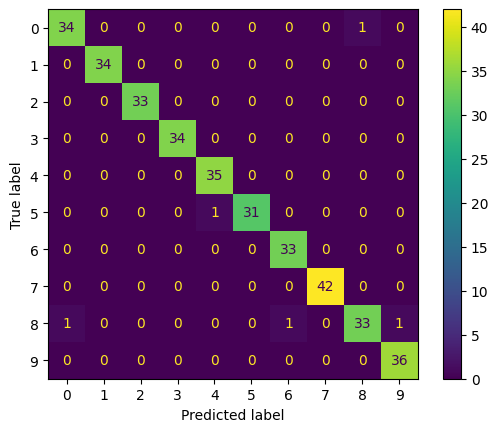

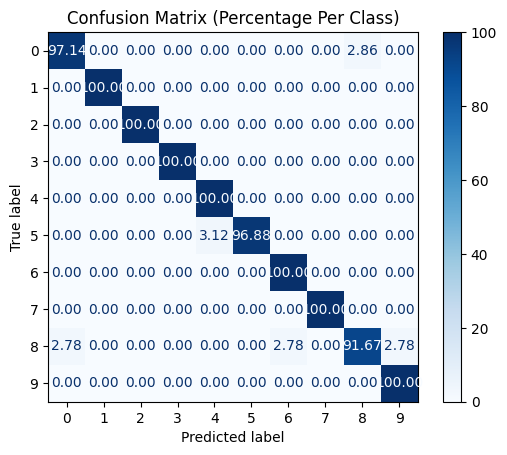

Accuracy Test:  98.57142857142858


In [10]:
from matplotlib import pyplot as plt
actual =y_test
feak_real, y_pred_test= discriminator.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis = 1)
confusion_matrix = metrics.confusion_matrix(actual, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

acc_test=accuracy_score(y_test, y_pred_test)
print("Accuracy Test: ", acc_test*100)